<h1 style="text-align: left;">PRINCING EU DOMESTIC ENERGY PRICES</h1>

Author: [Miguel Chamochin](https://www.linkedin.com/in/miguelchamochin/). 

This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

<h1 style="text-align: center;">Index</h1>

<a href="#h1-raw">A.- RAW DATA</a>

<a href="#h1-structure">B.- STRUCTURE DATA</a>

<a href="#h1-preprocessing ">C.- DATA PREPROCESSING</a>

<a href="#h1-eda">D.- EXPLORATORY DATA ANALYSIS (statistics and graphs)</a>

- <a href="#h2-describe">D.1- Describe the DataFrame</a>

- <a href="#h2-profile">D.2- Profile the DataFrame</a>

- <a href="#h2-correlation">D.3- Plot Correlation Matrix</a>

- <a href="#h2-lineraregression">D.4- Simple Linear Regression</a>

- <a href="#h2-trenseasonalitystationary">D.5- Analyze Trend, Seasonality, and Stationary</a>

- <a href="#h3-adf">D.5.1- Using Augmented Dickey-Fuller (ADF) test</a>

- <a href="#h3-hurst">D.5.2- Using Hurst’s exponent test</a>

- <a href="#h2-autocorrelationgraphic">D.6- Autocorrelation graphic</a>

- <a href="#h2-plotshifted1year">D.7- Plot Shifted Data, i.e. Current vs One Year Lagged</a>

- <a href="#h2-tsdetrended">D.8- Time Series Detrended</a>

- <a href="#h2-pacf">D.9- Partial Autocorrelation Function (PACF)</a>

- <a href="#h2-tsaddmuldecomposes">D.10- Time Series Descomposition: Additive and Multiplicative decomposes</a>

- <a href="#h2-autocorrelation2">D.11- Autocorrelation graphic to check Stational (see D.6)</a>

- <a href="#h2-correlationamonglags">D.12- Correlation among lags</a>

<a href="#h1-insights">E.- INSIGHTS, REPORT, AND VISUAL GRAPHS</a>

- <a href="#h2-visualizedf">E.1- Visualize DataFrames</a>

- <a href="#h2-visualizepricecountry2022">E.2- Visualize Producer Prices of Energy in each country for 2022</a>

- <a href="#h2-visualizepricecountry2022folium">E.3- Visualize Producer Prices of Energy in each country for 2022 with Folium</a>

- <a href="#h2-visualizerollingwindowmean">E.4- Visualize rolling window mean</a>

- <a href="#h2-visualizepricesyear">E.5- Visualize each year EU Producer Prices Energy (Domestic)</a>

- <a href="#h2-visualizetrenseasonalityevolution">E.6- Visualize Trend and Seasonality evolution</a>

<a href="#h1-modelling">F.- MODELLING</a>

<a href="#h2-timeseriesmodels">F.1.- --- TIME SERIES MODELS ---</a>

- <a href="#h3-sarimaunivariate">CASE 1: SARIMA (Seasonal ARIMA) Model – Univariate Modelling</a>

- <a href="#h3-sarimaxmultivariate">CASE 2: SARIMAX Adding external variables (X) to the SARIMA model – Multivariate Modelling</a>

<a href="#h2-supervisedmlmodels">F.2.- --- SUPERVISED MACHINE LEARNING MODELS ---</a>

- <a href="#h3-xgboost">CASE 3: Gradient Boosting with XGBoost</a>

- <a href="#h3-lightgbm">CASE 4: LightGBM model</a>

- <a href="#h3-ensemble">CASE 5: Ensemble with StandardScaler, PCA and XGBRegressor</a>

<a href="#h2-advancedmldl">F.3.- --- ADVANCED MACHINE AND DEEP LEARNING MODELS ---</a>

- <a href="#h3-cnnlstm">CASE 6: Combining CNN with Long Short-Term Memory (LSTM)</a>

- <a href="#h3-rnn">CASE 7: Recurrent Neural Networks (RNN): SimpleRNN, GRU, and LSTM</a>

    - <a href="#h4-rnn1">CASE 7.1: RNN with one LTSM layer</a>

    - <a href="#h4-rnn2">CASE 7.2: RNN with three-layer LSTM</a>

    - <a href="#h4-rnn3">CASE 7.3: Gated Recurrent Unit (GRU) with 3 layers</a>

    - <a href="#h4-rnn4">CASE 7.4: three layers of SimpleRNN</a>

- <a href="#h3-prophet">CASE 8: Prophet</a>

    - <a href="#h4-prophetwithouttransformation">CASE 8.1: Prophet without Transformation</a>
    
    - <a href="#h4-prophettransformation">CASE 8.2: Prophet with Box-Cox Transformation</a>

- <a href="#h3-deepar">CASE 9: Amazon's DeepAR</a>

<h1 id="h1-raw">A.- RAW DATA</h1>

### Import Libraries

In [55]:
# Import the required variables
import pandas as pd
import numpy as np


In [56]:
import matplotlib as mpl
from matplotlib import pyplot as plt, style # for ploting
import seaborn as sns

In [57]:
def warn(*args, **kwargs): pass
import warnings
warnings.warn = warn

In [58]:
sns.set_style("whitegrid")
sns.despine()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlesize=14, titlepad=10)

<Figure size 432x288 with 0 Axes>

### Check Current Path

In [59]:
import os

path = os.getcwd()

print(path)

d:\Users\mchamochin\Documents\DESARROLLO\PROFESIONAL\0 ONGOING 2022\Axpo\Python\Bootcamp\STEP 3 - Portfolio


### Data Collection

Create DataFrame with each Time Series

In [60]:
from pandas.tseries.offsets import MonthEnd

# Read data files
Industrial_Production = pd.read_excel ("./data/Producer_Prices_Energy.xlsx", sheet_name = "Industrial Production")
Industrial_Production['date'] = pd.to_datetime(Industrial_Production['date'], errors = 'coerce') + MonthEnd(0)
Industrial_Production.set_index('date', inplace=True)

Consumer_Price_Index = pd.read_excel ("./data/Producer_Prices_Energy.xlsx", sheet_name = "Consumer Price Index")
Consumer_Price_Index['date'] = pd.to_datetime(Consumer_Price_Index['date'], errors = 'coerce') + MonthEnd(0)
Consumer_Price_Index.set_index('date', inplace=True)

Producer_Prices_Energy_Dom = pd.read_excel ("./data/Producer_Prices_Energy.xlsx", sheet_name = "Producer Prices Energy Dom")
Producer_Prices_Energy_Dom['date'] = pd.to_datetime(Producer_Prices_Energy_Dom['date'], errors = 'coerce') + MonthEnd(0)
Producer_Prices_Energy_Dom.set_index('date', inplace=True)

Producer_Prices_Energy_Country = pd.read_excel ("./data/Producer_Prices_Energy.xlsx", sheet_name = "Producer Prices Energy Country")
Producer_Prices_Energy_Country['date'] = pd.to_datetime(Producer_Prices_Energy_Country['date'], errors = 'coerce') + MonthEnd(0)
Producer_Prices_Energy_Country.set_index('date', inplace=True)

# date comes into the YYYY-Qn, e.g 1995-Q1
GDP = pd.read_excel ("./data/Producer_Prices_Energy.xlsx", sheet_name = "GDP")
GDP['date'] = pd.to_datetime(GDP['date']) + MonthEnd(3)
GDP.set_index('date', inplace=True)

<h1 id="h1-structure">B.- STRUCTURE DATA</h1>

In [62]:
print(Industrial_Production.tail(1))
print(Consumer_Price_Index.tail(1))
print(Producer_Prices_Energy_Dom.tail(1))
print(Producer_Prices_Energy_Country.tail(1))
print(GDP.tail(1))

            Industrial_Production
date                             
2022-10-31                  116.3
            Consumer_Price_Index
date                            
2022-11-30                 123.4
            Producer_Prices_Energy_Domestic
date                                       
2022-10-31                            261.0
           country  Producer_Prices_Energy_Domestic
date                                               
2022-11-30      SK                            225.4
                GDP
date               
2022-09-30  112.127


In [63]:
# To align DatetimeIndex among Industrial_Production, Consumer_Price_Index and Producer_Prices_Energy_Dom DataFrames
Industrial_Production = Industrial_Production.loc['2000-01-31':'2022-10-31']
Consumer_Price_Index = Consumer_Price_Index.loc['2000-01-31':'2022-10-31']
Producer_Prices_Energy_Dom = Producer_Prices_Energy_Dom.loc['2000-01-31':'2022-10-31']
Producer_Prices_Energy_Country = Producer_Prices_Energy_Country.loc['2000-01-31':'2022-10-31']


In [64]:
# To align DatetimeIndex in between GDP DataFrame and the other DataFrames, 
tmp2 = GDP.copy()
tmp2 = tmp2.loc['2000-01-31':'2022-10-31']

tmp1 = Producer_Prices_Energy_Dom.copy()
tmp1.rename(columns={'Producer_Prices_Energy_Domestic': 'GDP'}, inplace = True)
tmp1['GDP'] = np.nan
tmp1['2000-01']=GDP['1999-12'] # Best fit for January December 

for i in range(len(tmp2)):
    tmp1.loc[tmp2.index[i]] = tmp2.iloc[i]
tmp1 = tmp1.loc['2000-01-31':'2022-10-31']
tmp1["GDP"] = tmp1["GDP"].interpolate(method = 'linear') # Linear interpolation for missing values, NaNs does not remain
GDP = tmp1

<h1 id="h1-preprocessing">C.- DATA PREPROCESSING</h1>

Detection of anomalous data and imputation of absent

In [65]:
Industrial_Production.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 274 entries, 2000-01-31 to 2022-10-31
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Industrial_Production  274 non-null    float64
dtypes: float64(1)
memory usage: 4.3 KB


In [66]:
Consumer_Price_Index.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 274 entries, 2000-01-31 to 2022-10-31
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Consumer_Price_Index  274 non-null    float64
dtypes: float64(1)
memory usage: 4.3 KB


In [67]:
Producer_Prices_Energy_Dom.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 274 entries, 2000-01-31 to 2022-10-31
Data columns (total 1 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Producer_Prices_Energy_Domestic  274 non-null    float64
dtypes: float64(1)
memory usage: 12.4 KB


In [68]:
Producer_Prices_Energy_Country.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12890 entries, 2000-01-31 to 2022-10-31
Data columns (total 2 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          12890 non-null  object 
 1   Producer_Prices_Energy_Domestic  12304 non-null  float64
dtypes: float64(1), object(1)
memory usage: 302.1+ KB


In [21]:
GDP.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 274 entries, 2000-01-31 to 2022-10-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GDP     274 non-null    float64
dtypes: float64(1)
memory usage: 4.3 KB


In [69]:
df = pd.concat([Producer_Prices_Energy_Dom['Producer_Prices_Energy_Domestic'],
                Industrial_Production['Industrial_Production'],
                Consumer_Price_Index['Consumer_Price_Index'],
                GDP['GDP']],
                axis=1)

<h1 id="h1-eda">D.- EXPLORATORY DATA ANALYSIS (statistics and graphs)</h1>

<h2 id="h2-describe">D.1- Describe the DataFrame</h2>

In [24]:
df.describe()

Producer_Prices_Energy_Domestic  Industrial_Production  \
count                       274.000000             274.000000   
mean                         98.409124              99.097810   
std                          32.918148               8.539694   
min                          58.300000              74.100000   
25%                          81.650000              93.525000   
50%                          97.350000              99.700000   
75%                         108.875000             105.175000   
max                         279.300000             116.700000   

       Consumer_Price_Index         GDP  
count            274.000000  274.000000  
mean              93.534891   96.771115  
std               11.342381    7.910730  
min               71.800000   81.036000  
25%               84.070000   90.999500  
50%               95.715000   96.555667  
75%              100.985000  102.331000  
max              123.260000  113.611000

<h2 id="h2-profile">D.2- Profile the DataFrame</h2>

In [14]:
# Import the pandas profiling package
from pandas_profiling import ProfileReport
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<h2 id="h2-correlation">D.3- Plot Correlation Matrix</h2>

<AxesSubplot:>

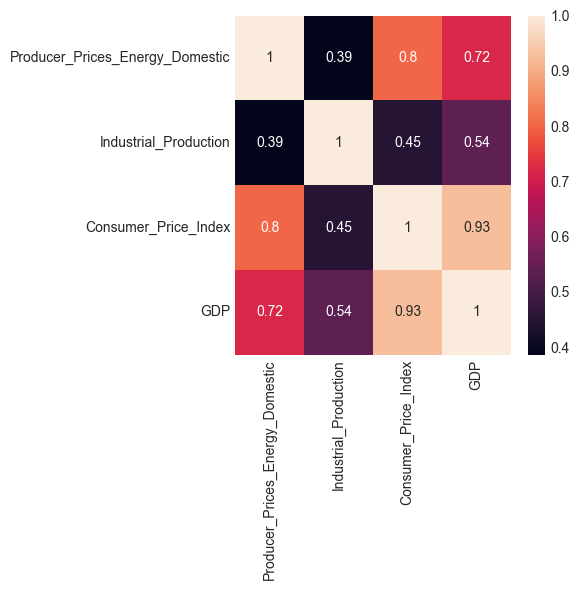

In [15]:
import seaborn as sns

plt.figure(figsize=(6,6), dpi=100)
sns.heatmap(df.corr(), annot=True)

We observe correlation among EU Producer Price of Energy (domestic) and the EU Consumer Price Index and EU GDP (years 2000.2022)

We do not observe correlation between EU Producer Price of Energy (domestic) and the Industrial production (years 2000.2022)

<h2 id="h2-lineraregression">D.4- Simple Linear Regression</h2>

In [42]:
#
# With Consumer_Price_Index
#
import numpy as np
from sklearn.linear_model import LinearRegression

y = df[['Consumer_Price_Index']].values
x = df['Producer_Prices_Energy_Domestic'].values.reshape((-1, 1))
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
# Calculate estimated values
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")  # The value of the slope = 𝑏₁ means that the predicted response rises by 𝑏₁ when 𝑥 is increased by one.

coefficient of determination: 0.6445281453269041
intercept: [66.31256927]
slope: [[0.27662396]]


In [43]:
#
# With GDP
#
import numpy as np
from sklearn.linear_model import LinearRegression

y = df[['GDP']].values
x = df['Producer_Prices_Energy_Domestic'].values.reshape((-1, 1))
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
# Calculate estimated values
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")  # The value of the slope = 𝑏₁ means that the predicted response rises by 𝑏₁ when 𝑥 is increased by one.

coefficient of determination: 0.5162678487639993
intercept: [79.77873951]
slope: [[0.17267073]]


In [44]:
#
# With Industrial_Production
#
import numpy as np
from sklearn.linear_model import LinearRegression

y = df[['Industrial_Production']].values
x = df['Producer_Prices_Energy_Domestic'].values.reshape((-1, 1))
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
# Calculate estimated values
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")  # The value of the slope = 𝑏₁ means that the predicted response rises by 𝑏₁ when 𝑥 is increased by one.


coefficient of determination: 0.149090981948221
intercept: [89.2402838]
slope: [[0.10016883]]


During the considered period (2000..2022):
- Consumer Prices rises by 0.27 when the Producer Prices of Energy in the EU domestic markets is increased by one.
- GDP rises by 0.17 when the Producer Prices of Energy in the EU domestic markets is increased by one.


<h2 id="h2-trenseasonalitystationary">D.5- Analyze Trend, Seasonality, and Stationary</h2>

<img src="Manning Process.png" 
     alt="Analysis Process"
     style="float: left; margin-right: 10px;" />

#### Is it Stacionary?

Some **key concepts**:

- A series is **_stationary_** when its statistical properties do not vary with time. The stationarity of a time series means that a time series does not have a (long-term) trend, i.e. it is stable around the same average. **Most models work with stationary series**. They must be converted in order to model the data. They will have a constant mean, variance and autocorrelation and we will be able to apply most statistical concepts.
- A series is **_non-stationary_** when its trend changes over time, its variance, or it has seasonality (periodic patterns).

- The **Autoregressive (AR)** part entails regressing the variable on its own lagged values. The idea is that the **_previous time period's value can help us predict the current time period's value_**. The **Autoregressive (AR)** models can theoretically have a trend coefficient in the model, but **_we need a stationary_** time serie.
- The **Moving Average (MA)** part involves**_ modeling the error term__** as a linear combination of **_error terms occurring at the same time step and at various lags in the past_**.

**ARIMA(p,d,q)** : ARIMA models are applied in the cases **where the data shows evidence of non-stationarity**. ARIMA models cannot have **seasonality**, for this reason we use d parameter to avoid it. If time series is stationary d = 0
- p -> Auto Regressive (AR), p orden del modelo = cuantos lags atrás miro
- d -> Integrated (I) = Número de veces que hay que diferenciar el TS (to eliminate seasonality)
- q -> Moving Average (MA), q orden del modelo = cuantos errores atrás quiero mirar

**SARIMA (Seasonal-ARIMA)** : we can use SARIMA **with seasonality**

**SARIMAX**: we add an exogenous variable, which is basically an external variable.

**What do I do to make it Stationary?**
1. **Seasonality**: the seasonal component will have to be removed. Differentiating (next slide) or using a SARIMA, which takes seasonality into account.
2. **Trend**: you have to remove it. It can be useful
        - a. Subtract the mean from the TS,
        - b. Subtract the trend component from the additive model or
        - c. Differentiate with a lag
3. **Autocorrelation**: differentiate first for a lag and then again if necessary to remove autocorrelation.

**How do I check that the TS is seasonal?**
1. **Plot**: most likely with a simple plot, we will see the repeated patterns in the time series
2. **Auto Correlation Function (ACF)**: How much correlated are the values with previous instants. Linear correlation gives us an indicator of how much one variable is linearly related to another. Autocorrelation is used to see if there is a relationship between each moment and its lags, that is, previous moments. If there is a monthly seasonality, there will be a correlation between each instant and its value 12 instants earlier. 24 moments later it will also be related, but not so much.

<h3 id="h3-adf">D.5.1- Using Augmented Dickey-Fuller (ADF) test</h3>

In [17]:
from statsmodels.tsa.stattools import adfuller


result = adfuller(df.Producer_Prices_Energy_Domestic)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# If (ADF Statistic >> Critical Value) OR (p-value >> 0.05)  -> Time series is most likely non-stationary
# If (ADF Statistic << Critical Values) OR (p-value <= 0.05) -> Time series is most likely stationary

ADF Statistic: -0.151453
p-value: 0.944066
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573


As (ADF Statistic >> Critical Value) OR (p-value >> 0.05)  -> Producer_Prices_Energy_Domestic time serie is most likely non-stationary

<h3 id="h3-hurst">D.5.2- Using Hurst’s exponent test</h3>

In [18]:
#! pip install hurst

import hurst
H, c,data = hurst.compute_Hc(df.Producer_Prices_Energy_Domestic)
print("H = {:.4f}, c = {:.4f}".format(H,c))

H = 0.6845, c = 1.2455


The value of H < 0.5, confirms a time series is stationary. THIS IS NOT OUR CASE, Producer_Prices_Energy_Domestic time serie is most likely non-stationary !

##### Let's study if the others Time Seriers are Stacionary 

In [19]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df.Producer_Prices_Energy_Domestic)
print(result[1]) # Provides the P-value
# Test statistic: -0.1514531671661875
# P-value: 0.94  > 0.05 -> IT IS NON-STACIONARY
print(result)
if result[1] < 0.05:
    print('Stationary')
else:
    print('Non-stationary')

0.944066274006286
(-0.15145316716618756, 0.944066274006286, 11, 262, {'1%': -3.455558114028747, '5%': -2.872635586277424, '10%': -2.572682677000175}, 1296.59628699409)
Non-stationary


Producer_Prices_Energy_Domestic time serie is most likely non-stationary

In [20]:
# The Augmented Dickey-Fuller test can be used to test whether a time series is stationary 
# -> Since the p-value is not less than 0.05, we fail to reject the null hypothesis. This means the time series IS NON-STACIONARY. 
# -> In other words, it has some time-dependent structure and does not have constant variance over time.

result = adfuller(df.Industrial_Production)
print(result[1]) # Provides the P-value
# Test statistic: -2.0047423158323032
# P-value: 0.28  > 0.05 -> IT IS NON-STACIONARY
print(result)
if result[1] < 0.05:
    print('Stationary')
else:
    print('Non-stationary')

0.2844976379930977
(-2.0047423158323032, 0.2844976379930977, 15, 258, {'1%': -3.455952927706342, '5%': -2.8728086526320302, '10%': -2.572774990685656}, 1217.920770511895)
Non-stationary


Industrial_Production time serie is most likely non-stationary

In [21]:
result = adfuller(df.Consumer_Price_Index)
print(result[1]) # Provides the P-value
# Test statistic: 2.0043527732617044
# P-value: 0.99  > 0.05 -> IT IS NON-STACIONARY
print(result)
if result[1] < 0.05:
    print('Stationary')
else:
    print('Non-stationary')

0.9986785805278985
(2.0043527732617044, 0.9986785805278985, 16, 257, {'1%': -3.4560535712549925, '5%': -2.8728527662442334, '10%': -2.5727985212493754}, 24.80832367398756)
Non-stationary


Consumer_Price_Index time serie is most likely non-stationary

In [22]:
result = adfuller(df.GDP)
print(result[1]) # Provides the P-value
# Test statistic: -0.9322503983763424
# P-value: 0.77  > 0.05 -> IT IS NON-STACIONARY
print(result)
if result[1] < 0.05:
    print('Stationary')
else:
    print('Non-stationary')

0.7771664927016497
(-0.9322503983763424, 0.7771664927016497, 10, 263, {'1%': -3.4554613060274972, '5%': -2.8725931472675046, '10%': -2.5726600403359887}, 372.07488744267704)
Non-stationary


GDP time serie is most likely non-stationary

<h2 id="h2-autocorrelationgraphic">D.6- Autocorrelation graphic</h2>

The autocorrelation function (ACF) measures the correlation of the time series with itself. It measures the correlation between a variable and itself at a previous timestep (lag). Here, the lag is simply the number of timesteps separating two values.

- In the presence of a trend, a plot of the ACF will show that the coefficients are high for short lags, and they will decrease linearly as the lag increases (an exponential drop). 
- If the data is seasonal, the ACF plot will also display cyclical patterns (an sinusoidal).

We see in autocorrelation if the past influences the present.

The autoregressive (AR) model describes a relationship between the present of a variable and its past. It is therefore suitable for variables in which the past and present values
correlate.

<span style="color:red">**We do not see there is a peak in the lags. lag-1 is the most correlated.**</span>

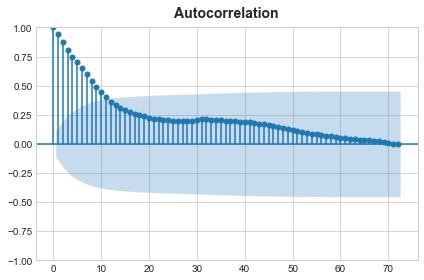

In [23]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df['Producer_Prices_Energy_Domestic'], lags=72);


In the grapgh you’ll notice how the autocorrelation coefficients slowly decrease as the lag increases, which is a clear indicator that our random walk is not a stationary process. Note that the shaded area represents a confidence interval. If a point is within the shaded area, then it is not significantly different from 0. Otherwise, the autocorrelation coefficient is significant.


##### Random walk

In the context of time series, a random walk is defined as a series whose first difference is stationary and uncorrelated. This means that the process moves completely at random.

If it is a non-stationary process, we will have to apply transformations, such as differencing, in order to make it stationary.

<h2 id="h2-plotshifted1year">D.7- Plot Shifted Data, i.e. Current vs One Year Lagged</h2>

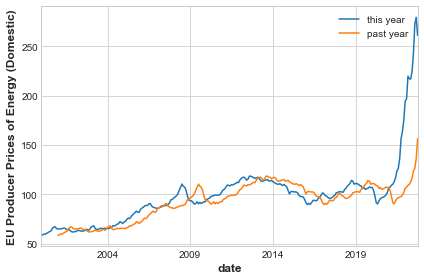

this year  past year
this year   1.000000   0.696052
past year   0.696052   1.000000

In [13]:
shifts = pd.DataFrame(
        {
            'this year': df.Producer_Prices_Energy_Domestic,
            'past year': df.Producer_Prices_Energy_Domestic.shift(12)
        }
    )
ax = shifts.plot()
ax.set_ylabel('EU Producer Prices of Energy (Domestic)')
plt.show()

shifts = shifts.dropna()
shifts.corr()

<h2 id="h2-tsdetrended">D.8- Time Series Detrended</h2>

Differencing a Time Series, i.e. remove the trend. This is a way of getting a time series **DETRENDED**

Since our sequence mostly displays changes in the trend without seasonal patterns (See below the autocorrelation function - ACF), we will apply a first-order differencing. 

In [26]:
# Difference the data
differenced_data = df['Producer_Prices_Energy_Domestic'].diff().dropna()


In [27]:
result = adfuller(differenced_data)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
if result[1] < 0.05:
    print('Stationary')
else:
    print('Non-stationary')

ADF Statistic: -1.7223369746457526
p-value: 0.41964209224464305
Non-stationary


<span style="color:red">**differenced_data SIGUE NO SIENDO STACIONARY.**</span>

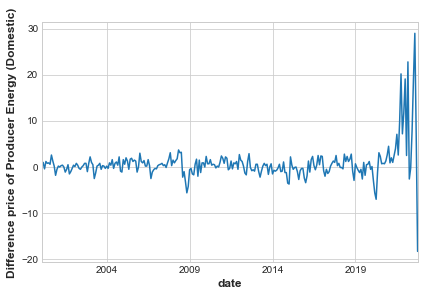

In [28]:
# Plot the differenced data
ax = differenced_data.plot()
ax.set_ylabel('Difference price of Producer Energy (Domestic)')
plt.show()

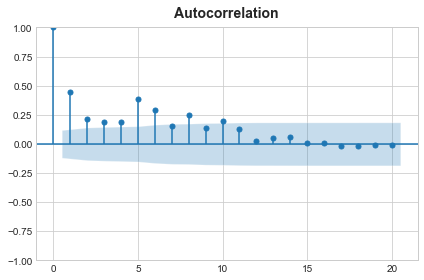

In [29]:
# We do not see there is a peak in the lags
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(differenced_data, lags=20);

In this plot, you should look for autocorrelation values that are at least higher than 0.2 or lower than -0.2. Anything below that can be considered noise. Using 0.3 or 0.4 as a minimum value is also possible: there is no strict guideline in interpreting the correlation coefficient, as in some domains data are noisier by nature. For example, in social studies, when working with measurements from questionnaire studies, you’ll often see much more noise than when working with precise physics measurements.

The blue area in the graph allows you to detect visually which autocorrelations are just noise: if the spike goes outside of the blue area, there is a significant autocorrelation, but if the spike stays within the blue area, the observed autocorrelation is insignificant. You can generally expect the autocorrelation to be higher in lags that are closer to the present and diminish toward further-away moments.

**As there is not a clear autocorrelation pattern, this would mean that to understand this year’s xxx, you need to look what happened not only what happened in one lag, but at several lags**

<h2 id="h2-pacf">D.9- Partial Autocorrelation Function (PACF)</h2>

The difference between autocorrelation and partial autocorrelation functions is that partial autocorrelation function (PACF) makes sure that any correlation is not counted multiple times for multiple lags. PACF considers the autocorrelation as a function of lag.

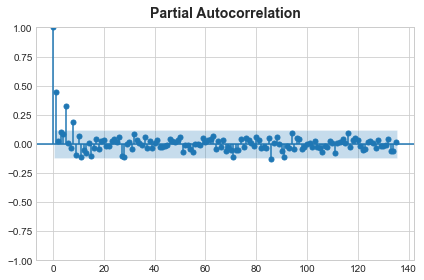

In [30]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(differenced_data, lags = 135)
plt.show()

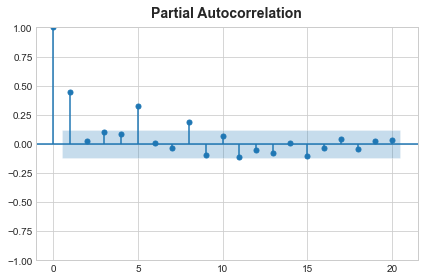

In [31]:
plot_pacf(differenced_data, lags = 20)
plt.show()



<span style="color:red">The PACF shows the 1st, 5th, and 8th lags outside of the shaded area. This means that it would be interesting to also include this lag in the AR model.</span>

<span style="color:red">**In practice, you will try to select the number of lags that gives your model the best predictive performance. -> ITERATION (hyperparameters grid search)**</span>

<h2 id="h2-tsaddmuldecomposes">D.10- Time Series Descomposition: Additive and Multiplicative decomposes</h2>

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['Producer_Prices_Energy_Domestic'], model = 'multiplicative', extrapolate_trend = 'freq')

# Additive Decomposition
result_add = seasonal_decompose(df['Producer_Prices_Energy_Domestic'], model = 'additive', extrapolate_trend = 'freq')

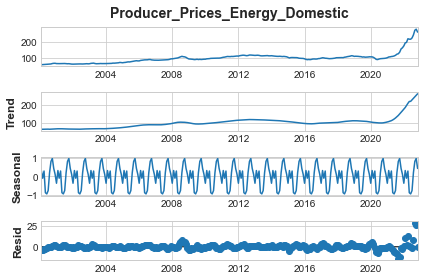

In [33]:
# To visualize the Additive Mode
result_add.plot(); 

The problem of having a trend in your data is general in univariate time series modeling.

In the seasonal we see that at the end of the year it increases, and at mid-year decrease. y-axis shows also negative values, as the seasonal component shows how we deviate from the trend, sometimes positively, others negatively.

Residuals usually correspond to random errors, also termed white noise. When we we might get the exact same value as in the first grapgh, i.e. observed, the residual will be zero.

<AxesSubplot:xlabel='date'>

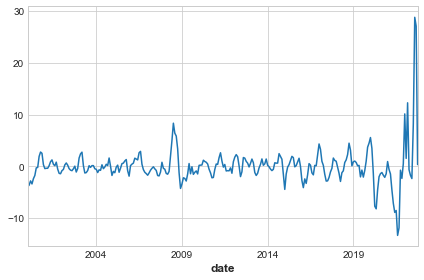

In [34]:
# To substract the trend, it remains seasonality and residue
detrended = df['Producer_Prices_Energy_Domestic'].values - result_add.trend 
detrended.plot()

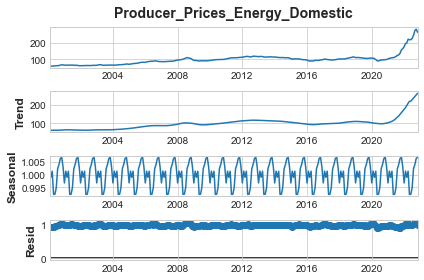

In [35]:
# To visualize the Multiplicative Mode
result_mul.plot();

<h2 id="h2-autocorrelation2">D.11- Autocorrelation graphic to check Stational (see D.6)</h2>

To check if the Time Serie is Stational (!= Stationary)

(1.0, 20.0)

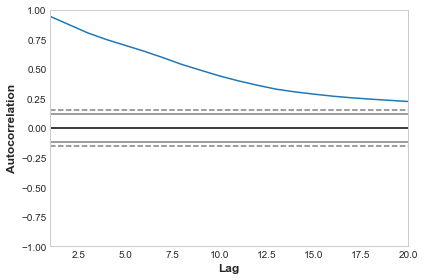

In [36]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['Producer_Prices_Energy_Domestic']);
# With plt.xticks() y plt.xlim (we goot the zoom)
# plt.xticks()
plt.xlim(1, 20) # Plotea los lags entre 1 y 20

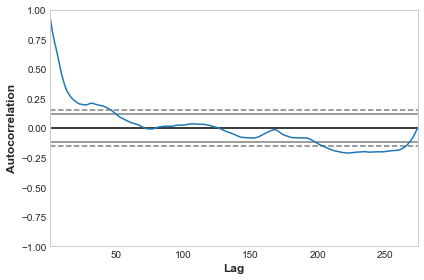

In [37]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['Producer_Prices_Energy_Domestic']);

We do not perceive peak in the lags axis, we do not see stacionality

<h2 id="h2-correlationamonglags">D.12- Correlation among lags</h2>

Does it exist dependency among the last 12 lags?

In [38]:
df2 = df.copy()
# Otra forma indicando el numero de lags
n_lags = 12 # Numero de lags
for i in range(n_lags,0,-1):
    df2['lag-'+str(i)] = df2['Producer_Prices_Energy_Domestic'].shift(i)
df2.dropna(inplace=True)
df2

Producer_Prices_Energy_Domestic  Industrial_Production  \
date                                                                 
2001-01-31                             64.7                   89.9   
2001-02-28                             64.9                   91.9   
2001-03-31                             64.9                  100.7   
2001-04-30                             65.2                   91.7   
2001-05-31                             65.6                   93.6   
...                                     ...                    ...   
2022-06-30                            224.6                  111.2   
2022-07-31                            243.6                  107.4   
2022-08-31                            272.6                   93.9   
2022-09-30                            279.3                  116.7   
2022-10-31                            261.0                  116.3   

            Consumer_Price_Index         GDP  lag-12  lag-11  lag-10  lag-9  \
date                                                                          
2001-01-31                 74.31   85.682000    58.3    58.8    59.8   59.4   
2001-02-28                 74.59   84.588000    58.8    59.8    59.4   60.6   
2001-03-31                 75.01   83.494000    59.8    59.4    60.6   61.4   
2001-04-30                 75.52   84.072333    59.4    60.6    61.4   62.3   
2001-05-31                 75.94   84.650667    60.6    61.4    62.3   62.9   
...                          ...         ...     ...     ...     ...    ...   
2022-06-30                119.03  111.983000   116.6   123.7   126.3  136.1   
2022-07-31                119.31  112.031000   123.7   126.3   136.1  156.3   
2022-08-31                120.10  112.079000   126.3   136.1   156.3  163.5   
2022-09-30                121.56  112.127000   136.1   156.3   163.5  175.2   
2022-10-31                123.26  112.127000   156.3   163.5   175.2  194.3   

            lag-8  lag-7  lag-6  lag-5  lag-4  lag-3  lag-2  lag-1  
date                                                                
2001-01-31   60.6   61.4   62.3   62.9   65.5   66.8   67.0   65.2  
2001-02-28   61.4   62.3   62.9   65.5   66.8   67.0   65.2   64.7  
2001-03-31   62.3   62.9   65.5   66.8   67.0   65.2   64.7   64.9  
2001-04-30   62.9   65.5   66.8   67.0   65.2   64.7   64.9   64.9  
2001-05-31   65.5   66.8   67.0   65.2   64.7   64.9   64.9   65.2  
...           ...    ...    ...    ...    ...    ...    ...    ...  
2022-06-30  156.3  163.5  175.2  194.3  196.8  219.6  217.0  216.8  
2022-07-31  163.5  175.2  194.3  196.8  219.6  217.0  216.8  224.6  
2022-08-31  175.2  194.3  196.8  219.6  217.0  216.8  224.6  243.6  
2022-09-30  194.3  196.8  219.6  217.0  216.8  224.6  243.6  272.6  
2022-10-31  196.8  219.6  217.0  216.8  224.6  243.6  272.6  279.3  

[262 rows x 16 columns]

<AxesSubplot:>

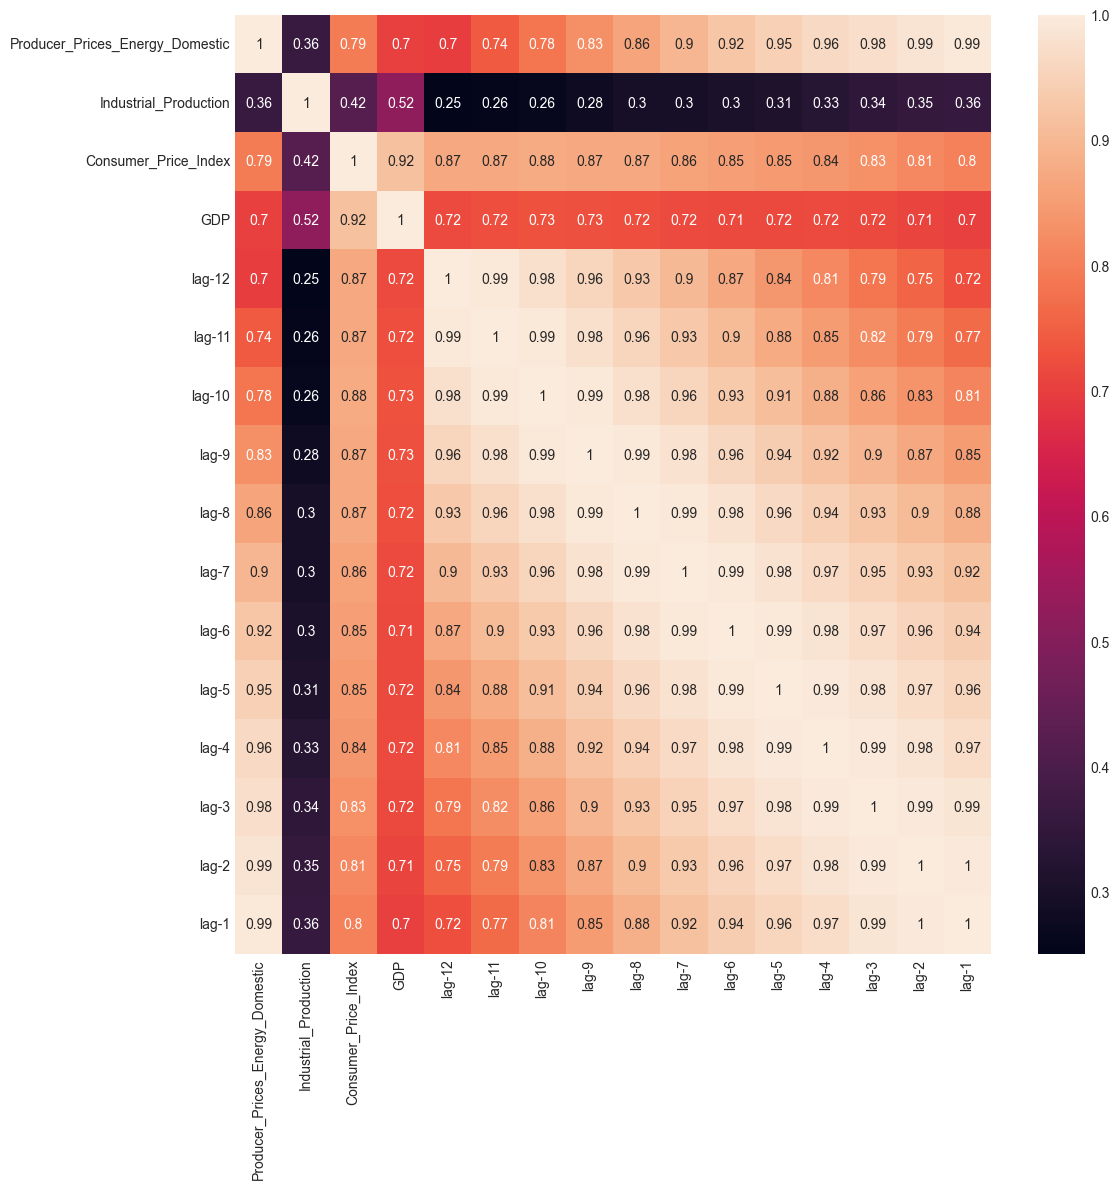

In [39]:
import seaborn as sns
plt.figure(figsize=(12,12), dpi=100)
sns.heatmap(df2.corr(), annot=True)

Producer_Prices_Energy_Domestic has more correlation with the lag-1

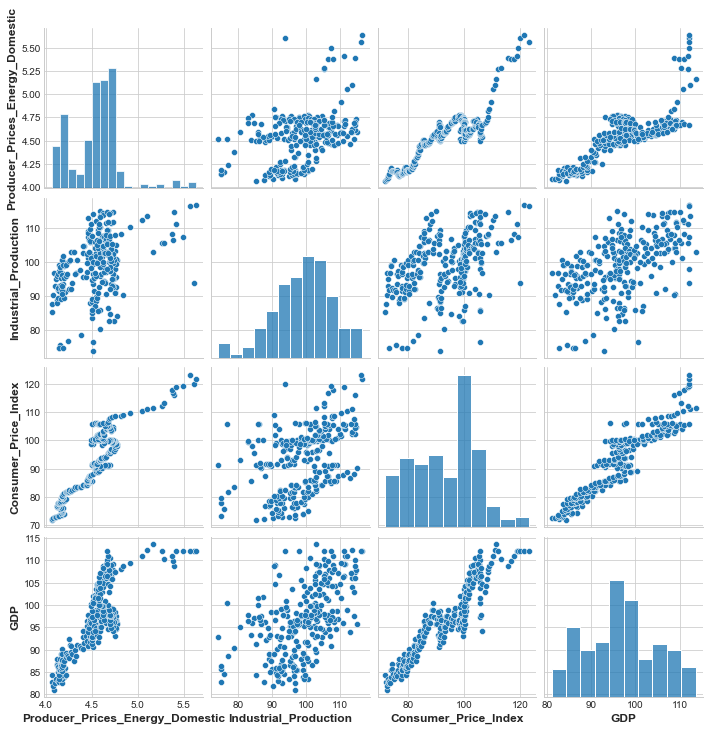

In [50]:
# To displot the datasets
df_tmp = df.copy()
# Transforming the Producer_Prices_Energy_Domestic we got better correlation
df_tmp['Producer_Prices_Energy_Domestic'] = np.log(df_tmp['Producer_Prices_Energy_Domestic'])
sns.pairplot(df_tmp);

<AxesSubplot:>

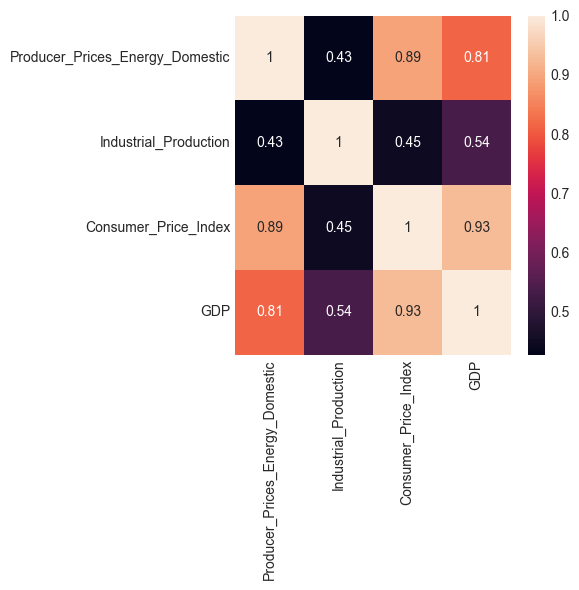

In [53]:
import seaborn as sns
plt.figure(figsize=(6,6), dpi=100)
sns.heatmap(df_tmp.corr(), annot=True)

<h1 id="h1-insights">E.- INSIGHTS, REPORT, AND VISUAL GRAPHS</h1>

<h2 id="h2-visualizedf">E.1- Visualize DataFrames</h2>

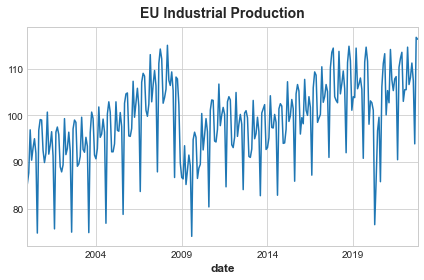

In [40]:
df.Industrial_Production.plot(title = 'EU Industrial Production');

<AxesSubplot:title={'center':'EU Consumer Price Index'}, xlabel='date'>

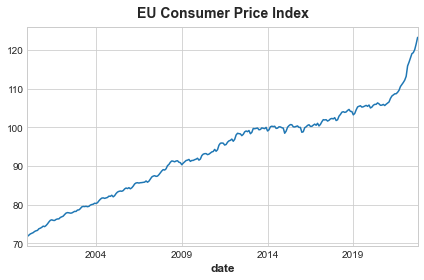

In [41]:
df.Consumer_Price_Index.plot(title = 'EU Consumer Price Index')

<AxesSubplot:title={'center':'EU Producer Prices Energy (Domestic)'}, xlabel='date'>

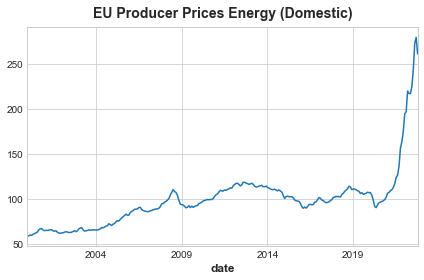

In [42]:
df.Producer_Prices_Energy_Domestic.plot(title = 'EU Producer Prices Energy (Domestic)')

<AxesSubplot:title={'center':'EU Gross Domestic Product'}, xlabel='date'>

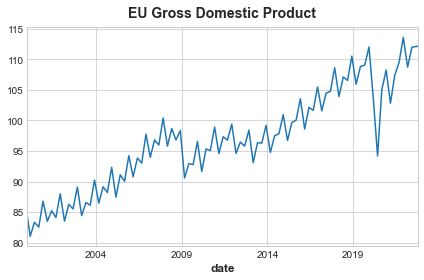

In [43]:
df.GDP.plot(title = 'EU Gross Domestic Product')

<h2 id="h2-visualizepricecountry2022">E.2- Visualize Producer Prices of Energy in each country for 2022</h2>

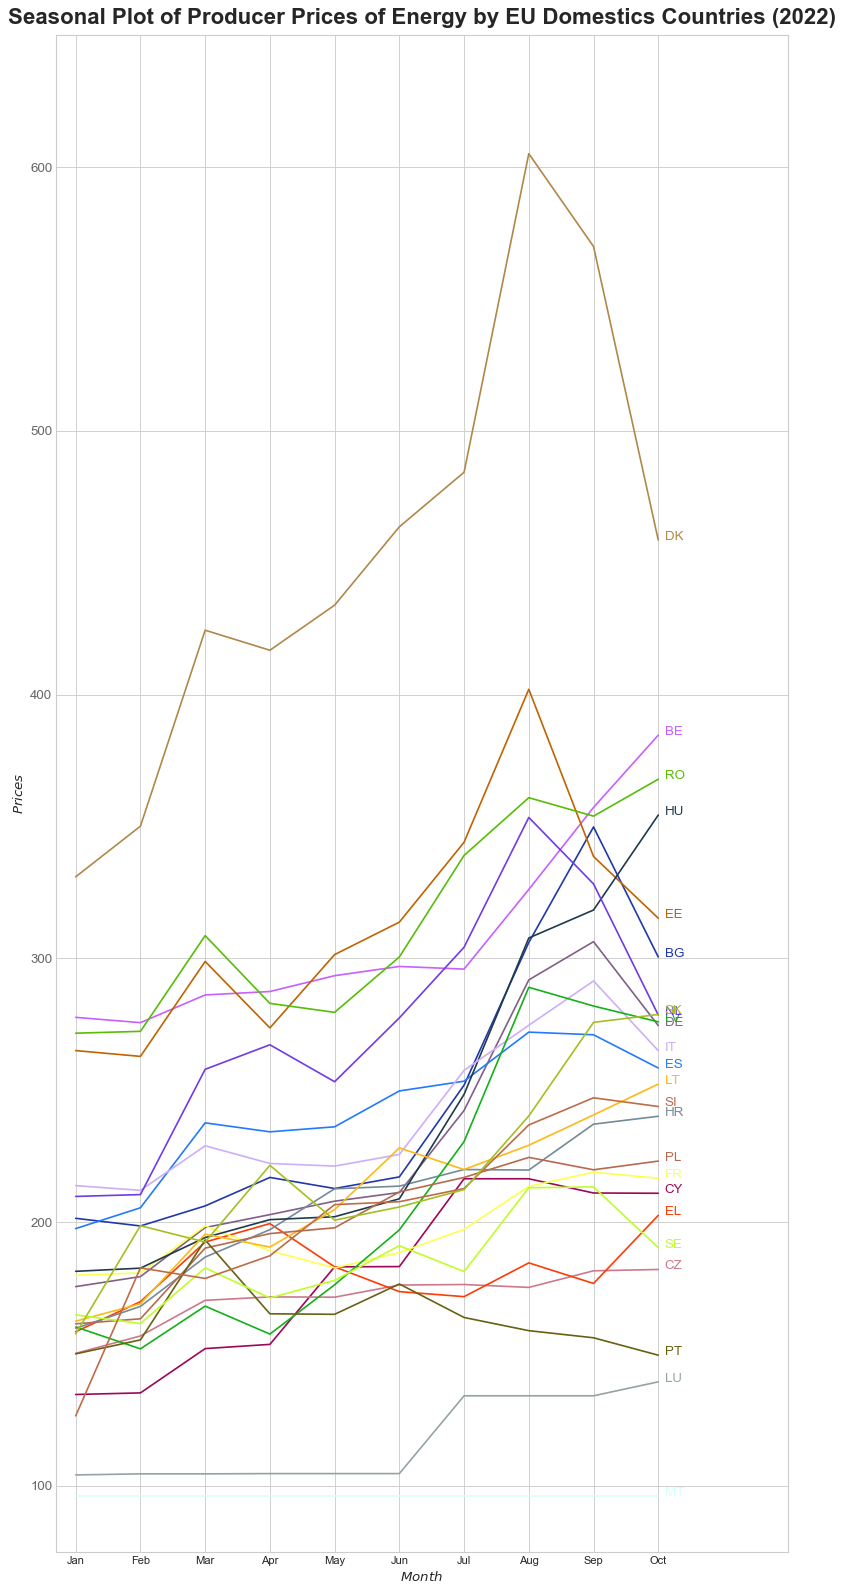

In [433]:
# Prep Colors

dfc = Producer_Prices_Energy_Country.copy()

np.random.seed(100)


# Append year and month columns
dfc['year'] = [d.year for d in dfc.index]
dfc['month'] = [d.strftime('%b') for d in dfc.index]
year = 2022

if (year == 2022):
    #dfc.drop(dfc[(dfc.country=='IE') | (dfc.country=='FI')].index, inplace=True) # For 2022 IE and FI are NaNs
    dfc = dfc[(dfc.country!='IE') & (dfc.country!='FI')]

countries = dfc.country.unique()
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(countries), replace=False) # Elige tantos colores como años

dfc.reset_index(inplace=True) # Set date as a column

# Draw Plot
plt.figure(figsize=(10,20), dpi= 80)
for i, country in enumerate(countries): # For each year in years
    if i > 0:        
        plt.plot('month', 'Producer_Prices_Energy_Domestic', data=dfc.loc[(dfc.country==country) & (dfc.year==year), :],
                                                            color=mycolors[i], label=country) # Plot month and Producer_Prices_Energy_Domestic for year & country
        plt.text(dfc.loc[(dfc.country==country) & (dfc.year==year), :].shape[0]-.9,
                 dfc.loc[(dfc.country==country) & (dfc.year==year), 'Producer_Prices_Energy_Domestic'][-1:].values[0],
                 country, fontsize=12, color=mycolors[i]) # Add text to axes.

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(75, 650), ylabel='$Prices$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Producer Prices of Energy by EU Domestics Countries " + '(' + str(year) + ')', fontsize=20)
plt.show();

<h2 id="h2-visualizepricecountry2022folium">E.3- Visualize Producer Prices of Energy in each country for 2022 with Folium</h2>

Data Visualisation Map of Producer Prices of Energy by EU Domestics Countries Using Python Folium

In [434]:
import json
import folium
import numpy as np
import pandas as pd

#! pip install folium

In [465]:
dfc_mean = dfc.copy()
dfc_mean.set_index('date', inplace = True)
dfc_mean.drop(['year', 'month'], axis=1, inplace=True)
# dfc_mean = dfc_mean.resample('BA').mean()
dfc_mean_2022 = dfc_mean['2022'].groupby('country')[['Producer_Prices_Energy_Domestic']].mean()
dfc_mean_2022.reset_index(inplace=True) # Set date as a column
dfc_mean_2022

country  Producer_Prices_Energy_Domestic
0       AT                           159.61
1       BE                           308.08
2       BG                           246.09
3       CY                           179.62
4       CZ                           171.15
5       DE                           228.95
6       DK                           453.76
7       EE                           311.51
8       EL                           181.20
9       ES                           241.53
10      FR                           196.53
11      HR                           205.45
12      HU                           239.83
13      IT                           241.22
14      LT                           209.20
15      LU                           116.86
16      LV                           208.82
17      MT                            96.00
18      NL                           274.01
19      PL                           200.39
20      PT                           163.34
21      RO                           313.71
22      SE                           184.68
23      SI                           202.96
24      SK                           218.34

In [466]:
import json
european_geo = r'data/european-union-countries.json'

# open the json file - json.load() methods returns a python dictionary
with open(european_geo) as countries_file:
    european_countries_json = json.load(countries_file)
    
# we loop through the dictionary to obtain the name of the communities in the json file
denominations_json = []
for index in range(len(european_countries_json['features'])):
    denominations_json.append(european_countries_json['features'][index]['properties']['name'])
denominations_json


['Hungary',
 'Cyprus',
 'France',
 'Slovenia',
 'Ireland',
 'Romania',
 'Latvia',
 'Poland',
 'Belgium',
 'Denmark',
 'Finland',
 'United Kingdom',
 'Lithuania',
 'Croatia',
 'Italy',
 'Greece',
 'Slovakia',
 'Czech Rep.',
 'Netherlands',
 'Spain',
 'Austria',
 'Sweden',
 'Portugal',
 'Luxembourg',
 'Estonia',
 'Germany',
 'Bulgaria',
 'Malta']

In [467]:
dataframe_names = dfc_mean_2022.country.tolist()
dataframe_names

['AT',
 'BE',
 'BG',
 'CY',
 'CZ',
 'DE',
 'DK',
 'EE',
 'EL',
 'ES',
 'FR',
 'HR',
 'HU',
 'IT',
 'LT',
 'LU',
 'LV',
 'MT',
 'NL',
 'PL',
 'PT',
 'RO',
 'SE',
 'SI',
 'SK']

In [468]:
# Ee modify in dfc_mean_2022 the names of the data frame (2 chars) by the names of the json file
geojson_names = ['Austria', 'Belgium', 'Bulgaria', 'Cyprus', 'Czech Rep.', 'Germany', 'Denmark', 'Estonia', 'Greece', 'Spain', 'France', 'Croatia', 'Hungary', 'Italy', 'Lithuania', 'Luxembourg', 'Latvia', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Sweden', 'Slovenia', 'Slovakia']
dfc_mean_2022.replace(dict(zip(dataframe_names, geojson_names)), inplace=True)
dfc_mean_2022

country  Producer_Prices_Energy_Domestic
0       Austria                           159.61
1       Belgium                           308.08
2      Bulgaria                           246.09
3        Cyprus                           179.62
4    Czech Rep.                           171.15
5       Germany                           228.95
6       Denmark                           453.76
7       Estonia                           311.51
8        Greece                           181.20
9         Spain                           241.53
10       France                           196.53
11      Croatia                           205.45
12      Hungary                           239.83
13        Italy                           241.22
14    Lithuania                           209.20
15   Luxembourg                           116.86
16       Latvia                           208.82
17        Malta                            96.00
18  Netherlands                           274.01
19       Poland                           200.39
20     Portugal                           163.34
21      Romania                           313.71
22       Sweden                           184.68
23     Slovenia                           202.96
24     Slovakia                           218.34

In [488]:
import folium

import json
european_geo = r'data/european-union-countries.json'

# create a plain world map
european_map = folium.Map(location=[56.2639, 9.5018], zoom_start=4, tiles='cartodbpositron')    #  tiles='stamenwatercolor' 
                                                                                                # location=[56.2639, 9.5018] is centered in Denmark

# generate choropleth map 
european_map.choropleth(
    geo_data=european_geo,
    data=dfc_mean_2022,
    columns=['country', 'Producer_Prices_Energy_Domestic'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', # YlGnBu
    fill_opacity=0.4, 
    nan_fill_opacity=0,
    line_opacity=1,
    legend_name='Producer Prices of Energy in EU Countries',
    highlight = False,
    smooth_factor=0)

# display map
european_map

<h2 id="h2-visualizerollingwindowmean">E.4- Visualize rolling window mean</h2>

In [44]:
def rolling_plot(df, title = '', window=12):
    df_rolling = df.rolling(window).mean()
    plt.plot(df, color='blue', label='Original')
    # Plot graph with 12 lags, vseasonality is disguised
    plt.plot(df_rolling.dropna(), color='red', label='Rolling Mean 12 lags')
    plt.legend()
    plt.title("Rolling Mean " + title)

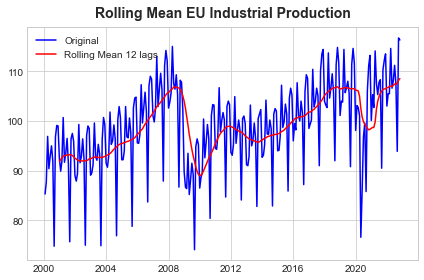

In [45]:
rolling_plot(df.Industrial_Production, 'EU Industrial Production', 12)

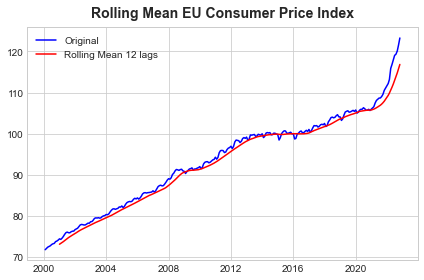

In [46]:
rolling_plot(df.Consumer_Price_Index, 'EU Consumer Price Index', 12)

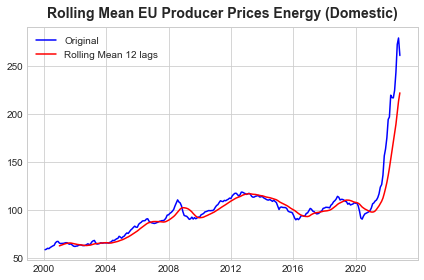

In [45]:
rolling_plot(df.Producer_Prices_Energy_Domestic, 'EU Producer Prices Energy (Domestic)', 12)

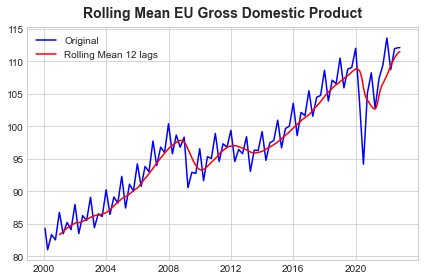

In [47]:
rolling_plot(df.GDP, 'EU Gross Domestic Product', 12)

In [286]:
df.Producer_Prices_Energy_Domestic

0       58.3
1       58.8
2       59.8
3       59.4
4       60.6
       ...  
269    224.6
270    243.6
271    272.6
272    279.3
273    261.0
Name: Producer_Prices_Energy_Domestic, Length: 274, dtype: float64

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 274 entries, 2000-01-31 to 2022-10-31
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Producer_Prices_Energy_Domestic  274 non-null    float64
 1   Industrial_Production            274 non-null    float64
 2   Consumer_Price_Index             274 non-null    float64
 3   GDP                              274 non-null    float64
dtypes: float64(4)
memory usage: 18.8 KB


<h2 id="h2-visualizepricesyear">E.5- Visualize each year EU Producer Prices Energy (Domestic)</h2>

In [322]:
# Prepare data - añade dos columnas year y month a partir de df.date
df['year'] = [d.year for d in df.index]
df['month'] = [d.strftime('%b') for d in df.index]
years = df['year'].unique()
years

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022], dtype=int64)

In [323]:
df

Producer_Prices_Energy_Domestic  Industrial_Production  \
date                                                                 
2000-01-31                             58.3                   85.3   
2000-02-29                             58.8                   87.7   
2000-03-31                             59.8                   96.9   
2000-04-30                             59.4                   90.4   
2000-05-31                             60.6                   93.0   
...                                     ...                    ...   
2022-06-30                            224.6                  111.2   
2022-07-31                            243.6                  107.4   
2022-08-31                            272.6                   93.9   
2022-09-30                            279.3                  116.7   
2022-10-31                            261.0                  116.3   

            Consumer_Price_Index         GDP  year month  
date                                                      
2000-01-31                 71.80   84.315000  2000   Jan  
2000-02-29                 72.10   82.675500  2000   Feb  
2000-03-31                 72.42   81.036000  2000   Mar  
2000-04-30                 72.59   81.809333  2000   Apr  
2000-05-31                 72.76   82.582667  2000   May  
...                          ...         ...   ...   ...  
2022-06-30                119.03  111.983000  2022   Jun  
2022-07-31                119.31  112.031000  2022   Jul  
2022-08-31                120.10  112.079000  2022   Aug  
2022-09-30                121.56  112.127000  2022   Sep  
2022-10-31                123.26  112.127000  2022   Oct  

[274 rows x 6 columns]

In [324]:
df.reset_index(inplace=True) # Set date as a column
# df = df.rename(columns = {'index':'date'})

In [325]:
df

date  Producer_Prices_Energy_Domestic  Industrial_Production  \
0   2000-01-31                             58.3                   85.3   
1   2000-02-29                             58.8                   87.7   
2   2000-03-31                             59.8                   96.9   
3   2000-04-30                             59.4                   90.4   
4   2000-05-31                             60.6                   93.0   
..         ...                              ...                    ...   
269 2022-06-30                            224.6                  111.2   
270 2022-07-31                            243.6                  107.4   
271 2022-08-31                            272.6                   93.9   
272 2022-09-30                            279.3                  116.7   
273 2022-10-31                            261.0                  116.3   

     Consumer_Price_Index         GDP  year month  
0                   71.80   84.315000  2000   Jan  
1                   72.10   82.675500  2000   Feb  
2                   72.42   81.036000  2000   Mar  
3                   72.59   81.809333  2000   Apr  
4                   72.76   82.582667  2000   May  
..                    ...         ...   ...   ...  
269                119.03  111.983000  2022   Jun  
270                119.31  112.031000  2022   Jul  
271                120.10  112.079000  2022   Aug  
272                121.56  112.127000  2022   Sep  
273                123.26  112.127000  2022   Oct  

[274 rows x 7 columns]

In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   date                             274 non-null    datetime64[ns]
 1   Producer_Prices_Energy_Domestic  274 non-null    float64       
 2   Industrial_Production            274 non-null    float64       
 3   Consumer_Price_Index             274 non-null    float64       
 4   GDP                              274 non-null    float64       
 5   year                             274 non-null    int64         
 6   month                            274 non-null    object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 15.1+ KB


In [329]:
df.loc[df.year==2008, :].shape[0]-.9

11.1

In [330]:
df.loc[df.year==2008, 'Producer_Prices_Energy_Domestic'][-1:].values[0]

94.1

In [331]:
df.loc[df.year==2008, 'Producer_Prices_Energy_Domestic'][-1:]

107    94.1
Name: Producer_Prices_Energy_Domestic, dtype: float64

In [332]:
df.loc[df.year==2008, 'Producer_Prices_Energy_Domestic']

96      96.2
97      97.1
98      98.5
99     100.3
100    104.0
101    107.1
102    110.3
103    108.1
104    107.1
105    103.9
106     98.3
107     94.1
Name: Producer_Prices_Energy_Domestic, dtype: float64

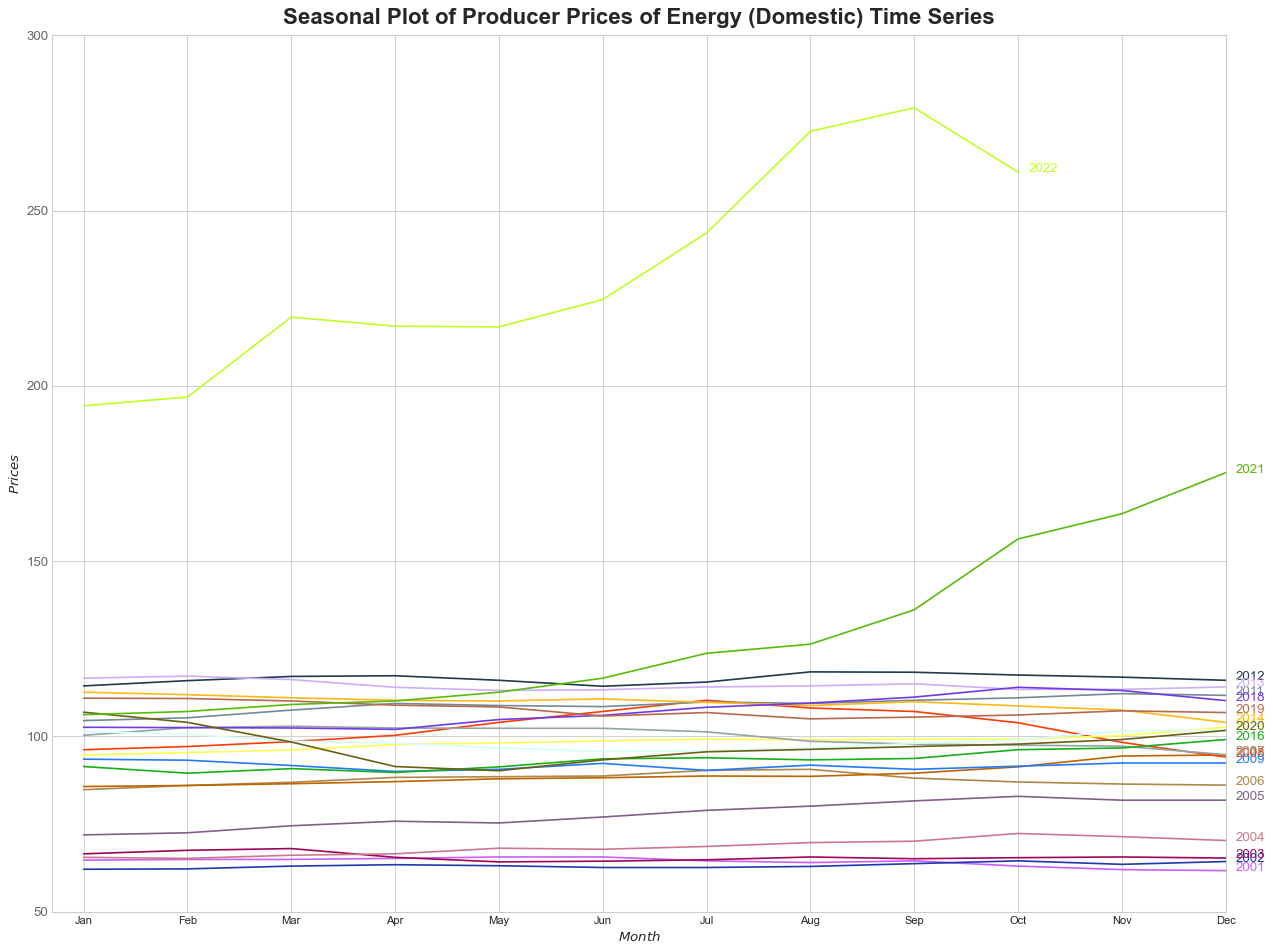

In [54]:
# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False) # Elige tantos colores como años

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years): # Para cada año en years
    if i > 0:        
        plt.plot('month', 'Producer_Prices_Energy_Domestic', data=df.loc[df.year==y, :], color=mycolors[i], label=y) # Plotea las columnas month y value para year y
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'Producer_Prices_Energy_Domestic'][-1:].values[0], y, fontsize=12, color=mycolors[i]) # Add text to the Axes.

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(50, 300), ylabel='$Prices$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Producer Prices of Energy (Domestic) Time Series", fontsize=20)
plt.show()

<h2 id="h2-visualizetrenseasonalityevolution">E.6- Visualize Trend and Seasonality evolution</h2>

In [55]:
df

date  Producer_Prices_Energy_Domestic  Industrial_Production  \
0   2000-01-31                             58.3                   85.3   
1   2000-02-29                             58.8                   87.7   
2   2000-03-31                             59.8                   96.9   
3   2000-04-30                             59.4                   90.4   
4   2000-05-31                             60.6                   93.0   
..         ...                              ...                    ...   
269 2022-06-30                            224.6                  111.2   
270 2022-07-31                            243.6                  107.4   
271 2022-08-31                            272.6                   93.9   
272 2022-09-30                            279.3                  116.7   
273 2022-10-31                            261.0                  116.3   

     Consumer_Price_Index         GDP  year month  
0                   71.80   84.315000  2000   Jan  
1                   72.10   82.675500  2000   Feb  
2                   72.42   81.036000  2000   Mar  
3                   72.59   81.809333  2000   Apr  
4                   72.76   82.582667  2000   May  
..                    ...         ...   ...   ...  
269                119.03  111.983000  2022   Jun  
270                119.31  112.031000  2022   Jul  
271                120.10  112.079000  2022   Aug  
272                121.56  112.127000  2022   Sep  
273                123.26  112.127000  2022   Oct  

[274 rows x 7 columns]

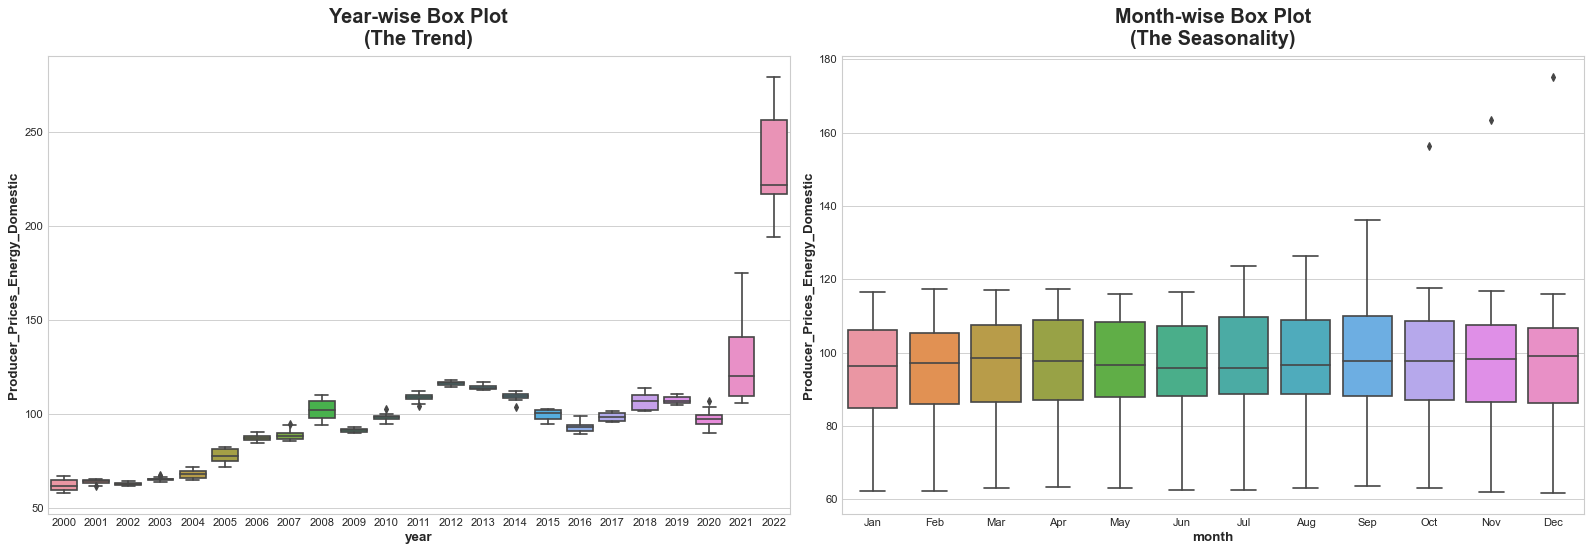

In [56]:
# Draw Plot - hace unos subplots
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='Producer_Prices_Energy_Domestic', data=df, ax=axes[0])
sns.boxplot(x='month', y='Producer_Prices_Energy_Domestic', data=df.loc[~df.year.isin([2000, 2022]), :]) # Seasonality por months

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

In [57]:
df.set_index('date', inplace = True)
df.drop(['year', 'month'], axis=1, inplace=True)
df

Producer_Prices_Energy_Domestic  Industrial_Production  \
date                                                                 
2000-01-31                             58.3                   85.3   
2000-02-29                             58.8                   87.7   
2000-03-31                             59.8                   96.9   
2000-04-30                             59.4                   90.4   
2000-05-31                             60.6                   93.0   
...                                     ...                    ...   
2022-06-30                            224.6                  111.2   
2022-07-31                            243.6                  107.4   
2022-08-31                            272.6                   93.9   
2022-09-30                            279.3                  116.7   
2022-10-31                            261.0                  116.3   

            Consumer_Price_Index         GDP  
date                                          
2000-01-31                 71.80   84.315000  
2000-02-29                 72.10   82.675500  
2000-03-31                 72.42   81.036000  
2000-04-30                 72.59   81.809333  
2000-05-31                 72.76   82.582667  
...                          ...         ...  
2022-06-30                119.03  111.983000  
2022-07-31                119.31  112.031000  
2022-08-31                120.10  112.079000  
2022-09-30                121.56  112.127000  
2022-10-31                123.26  112.127000  

[274 rows x 4 columns]

Monthly Analysis of the EU Producer Prices of Energy in the Domestic markets:
- July and September higher prices
- February and December lower prices

Yearly Analysis:
- In 2021 and 2022 a huge increase, being 2022 the highest increase

<h1 id="h1-modelling">F.- MODELLING</h1>

<h2 id="h2-timeseriesmodels">F.1.- --- TIME SERIES MODELS ---</h2>

<h3 id="h3-sarimaunivariate">CASE 1: SARIMA (Seasonal ARIMA) Model – Univariate Modelling</h3>

Within univariate time series modeling, the SARIMA model is the most complete model, using AR, MA, integration for modeling trends, and seasonality.

Adding seasonality (S) to the ARIMA model

Transformations are used to make a series stationary. Differencing can stabilize the trend and seasonality, while logarithms stabilize the variance.

As Producer_Prices_Energy_Domestic is not stacionary we use SARIMA or SARIMAX.

Univariate time series allows forecasting one variable based on past variation in itself. Those models are useful when you either don’t have any other data to use in the modeling process or, more importantly, when there really is a time series component (like autoregression, moving average, etc.) present in the data.

I can use the Box-Con transformation... in my case, it provided worse results

In [58]:
def inverse_boxcox(y, lambda_):
    return np.exp(y) if lambda_ == 0 else np.exp(np.log(lambda_ * y + 1) / lambda_)

Let's use the SARIMA Model

In [59]:
 # Import libraries
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

from scipy import stats

df1 = df.copy()

#
# To save train / test samples
#
# Split train and test. 80% for train
train_len = (int)(0.41 * len(df1))

# Note: test not transformed (if transformed), because we will calculate erros with original data
test = df1['Producer_Prices_Energy_Domestic'][train_len:]

# train can be transformed, if not comment adecuately
train = df1['Producer_Prices_Energy_Domestic'][:train_len] # WITHOUT TRANSFORMATION
#train, lambda_prophet = stats.boxcox(df1['Producer_Prices_Energy_Domestic'][:train_len])  # WITH TRANSFORMATION


# With autoarima. We pass train argument, start and end values for p, q, d
# We set Stationary = False
# With trace = True shows the different iterations
# It returns the best p, q, d parameters
model = auto_arima(
    train,
    start_p=1,
    start_q=1,
    # max_d=3,
    max_d=3, # I wanted to check 1,5 and 8 lags
    max_p=5,
    max_q=5,
    stationary=False
    # trace=True
)

In [60]:
#  To get the best p, q, d, results in this case (1, 1, 0) to minimze AIC.
model

ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [61]:
model.summary() # it gets an AIC = 360.256

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  112
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -178.128
Date:                Sun, 25 Dec 2022   AIC                            360.256
Time:                        11:09:03   BIC                            365.675
Sample:                             0   HQIC                           362.454
                                - 112                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5435      0.060      9.067      0.000       0.426       0.661
sigma2         1.4455      0.151      9.568      0.000       1.149       1.742
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                22.14
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.89   Skew:                            -0.73
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [62]:
# To predict with the best model, it takes the time interval to predict.
predictions = model.predict(len(test)) 
predictions

array([89.07602285, 88.5738265 , 88.30087477, 88.15252114, 88.07188858,
       88.02806349, 88.00424386, 87.9912975 , 87.98426096, 87.98043648,
       87.97835781, 87.97722803, 87.97661397, 87.97628022, 87.97609882,
       87.97600023, 87.97594664, 87.97591752, 87.97590169, 87.97589308,
       87.97588841, 87.97588586, 87.97588448, 87.97588373, 87.97588332,
       87.9758831 , 87.97588298, 87.97588292, 87.97588288, 87.97588286,
       87.97588285, 87.97588284, 87.97588284, 87.97588284, 87.97588284,
       87.97588284, 87.97588284, 87.97588284, 87.97588284, 87.97588284,
       87.97588284, 87.97588284, 87.97588284, 87.97588284, 87.97588284,
       87.97588284, 87.97588284, 87.97588284, 87.97588284, 87.97588284,
       87.97588284, 87.97588284, 87.97588284, 87.97588284, 87.97588284,
       87.97588284, 87.97588284, 87.97588284, 87.97588284, 87.97588284,
       87.97588284, 87.97588284, 87.97588284, 87.97588284, 87.97588284,
       87.97588284, 87.97588284, 87.97588284, 87.97588284, 87.97

In [63]:
test.values

array([ 90.6,  92.3,  90.3,  91.8,  90.6,  91.5,  92.4,  92.4,  94.7,
        95.4,  96.1,  97.7,  98.1,  98.7,  99.2,  99. ,  99.2,  99.2,
       100.2, 102.6, 104.5, 105.3, 107.5, 109.4, 108.8, 108.5, 109.8,
       109.4, 110.3, 111. , 112.2, 111.7, 114.4, 115.9, 117.1, 117.3,
       116. , 114.3, 115.5, 118.4, 118.3, 117.5, 116.9, 116. , 116.6,
       117.2, 116.2, 114. , 113.1, 113.3, 114.1, 114.4, 115. , 113.4,
       113.4, 114.1, 112.6, 111.9, 111. , 110.3, 110.1, 110.7, 109.7,
       108.8, 109.9, 108.7, 107.5, 104. , 100.3, 102.5, 102.9, 102.4,
       102.3, 102.3, 101.3,  98.6,  97.8,  97.5,  97.2,  94.8,  91.4,
        89.5,  90.8,  89.7,  91.3,  93.6,  93.9,  93.3,  93.7,  96.2,
        96.7,  99.1, 101.4, 100.6,  98.6,  98.1,  96.7,  95.7,  95.9,
        96.7,  98. ,  99. , 101.5, 101.8, 102.6, 102.5, 102.4, 102. ,
       104.8, 106. , 108.3, 109.5, 111.2, 114. , 113.1, 110.2, 110.9,
       110.8, 110.1, 108.9, 108.4, 105.8, 106.8, 105. , 105.5, 106.1,
       107.3, 106.8,

In [64]:
# If transformed, please uncomment
# lambda_prophet

In [64]:
# Restore the transformation of predictions (if required)
#predictions = inverse_boxcox(predictions, lambda_prophet) # WITH TRANSFORMATION, recover original predictions
predictions

array([89.07602285, 88.5738265 , 88.30087477, 88.15252114, 88.07188858,
       88.02806349, 88.00424386, 87.9912975 , 87.98426096, 87.98043648,
       87.97835781, 87.97722803, 87.97661397, 87.97628022, 87.97609882,
       87.97600023, 87.97594664, 87.97591752, 87.97590169, 87.97589308,
       87.97588841, 87.97588586, 87.97588448, 87.97588373, 87.97588332,
       87.9758831 , 87.97588298, 87.97588292, 87.97588288, 87.97588286,
       87.97588285, 87.97588284, 87.97588284, 87.97588284, 87.97588284,
       87.97588284, 87.97588284, 87.97588284, 87.97588284, 87.97588284,
       87.97588284, 87.97588284, 87.97588284, 87.97588284, 87.97588284,
       87.97588284, 87.97588284, 87.97588284, 87.97588284, 87.97588284,
       87.97588284, 87.97588284, 87.97588284, 87.97588284, 87.97588284,
       87.97588284, 87.97588284, 87.97588284, 87.97588284, 87.97588284,
       87.97588284, 87.97588284, 87.97588284, 87.97588284, 87.97588284,
       87.97588284, 87.97588284, 87.97588284, 87.97588284, 87.97

In [65]:
# To get MAE and MAPE
print('Test --------------------')
print("MAE Test", mean_absolute_error(test, predictions))
print("MAPE Test", mean_absolute_percentage_error(test, predictions))
print("R2 Score Test", r2_score(test, predictions))

Test --------------------
MAE Test 25.776524387076247
MAPE Test 0.1885510785293897
R2 Score Test -0.5960930686598751


Test and predictions visualization

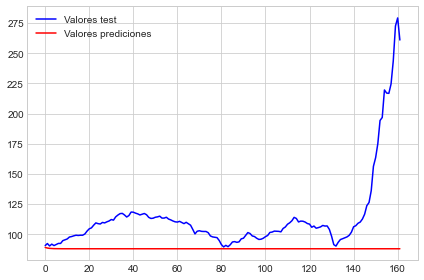

In [66]:
# Plot test and predictions values
plt.plot(test.values, color="blue", label="Valores test")
plt.plot(predictions, color="red", label="Valores prediciones")
plt.legend();

It is lower without BoxCox transformation in this particula case

<span style="color:red">**SARIMA PREDICT BADLY.**</span>

<h3 id="h3-sarimaxmultivariate">CASE 2: SARIMAX Adding external variables (X) to the SARIMA model – Multivariate Modelling</h3>

Adding external variables make the model not univariate anymore.

Multivariate time series models, which do the same thing that univariate time series but applied to multiple time series at the same time. They have an advantage when you need to forecast multiple time series at the same time, as you have to build only one model for multiple time series rather than building a model for each. Also, it can benefit from shared variation between the time series and have an advantage in performance.

SARIMAX vs supervised models (liner regrassion, Decission Tree, KNN, Random Forest, XGBoost, and LightGBM): SARIMAX may be preferred in cases where the time series part is more present than the external variables part. If the external variables alone can explain a lot and this is complemented by a part of autocorrelation or seasonality, supervised models may be the better choice.

In [67]:
df1 = df.copy()
for i in range(12,0,-1):
     df1['lag-'+str(i)] = df1['Producer_Prices_Energy_Domestic'].shift(i)
df1.dropna(inplace=True)

train_len = (int)(0.41 * len(df1))

from scipy import stats
# Split train / test samples
train = df1['Producer_Prices_Energy_Domestic'][:train_len]
test = df1['Producer_Prices_Energy_Domestic'][train_len:]

from pmdarima.arima import auto_arima

model = auto_arima(train,
                    exogenous = df1[['lag-1', 'lag-2','lag-3', 'lag-4','lag-5','lag-6','lag-7','lag-8','lag-9','lag-10','lag-11','lag-12']][:train_len].values,
                    start_p=1,
                    start_q=1,
                    max_d=3,
                    max_p=5,
                    max_q=5,
                    stationary=False,
                    # m=12, I comment this 12 lags of stacionality
                    trace=True,
                    stepwise=True)

print('Model AIC = ',model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=384.184, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=379.013, Time=0.21 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=382.109, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=382.184, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=378.165, Time=0.09 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.587 seconds
Model AIC =  378.16528797089137


In [68]:
from pmdarima.arima import ARIMA
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

# I get the best model parameters to predict
model = ARIMA(order=(0,0,0)) # Best model:  ARIMA(0,0,0)(0,0,0)[0] 

model.fit(train, exogenous = df1[['lag-1', 'lag-2','lag-3', 'lag-4','lag-5','lag-6','lag-7','lag-8','lag-9','lag-10','lag-11','lag-12']][:train_len].values)

predictions = model.predict(len(test) , exogenous = df1[['lag-1', 'lag-2','lag-3', 'lag-4','lag-5','lag-6','lag-7','lag-8','lag-9','lag-10','lag-11','lag-12']][train_len:])

# To get MAE and MAPE
print('Test --------------------')
print("MAE Test", mean_absolute_error(test, predictions))
print("MAPE Test", mean_absolute_percentage_error(test, predictions))
print("R2 Score Test", r2_score(test, predictions))

Test --------------------
MAE Test 2.1157711852190224
MAPE Test 0.015185662902343243
R2 Score Test 0.9836724187452714


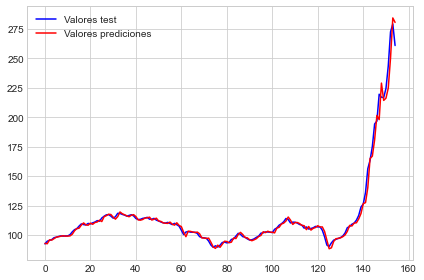

In [69]:
# Plot test and predictions values
plt.plot(test.values, color="blue", label="Valores test")
plt.plot(predictions, color="red", label="Valores prediciones")
plt.legend();

<span style="color:red">**SARIMAX provides not bad results MAPE = 0.0151 = 1.51%**</span>

In [70]:
train


date
2001-01-31    64.7
2001-02-28    64.9
2001-03-31    64.9
2001-04-30    65.2
2001-05-31    65.6
              ... 
2009-07-31    90.3
2009-08-31    91.8
2009-09-30    90.6
2009-10-31    91.5
2009-11-30    92.4
Name: Producer_Prices_Energy_Domestic, Length: 107, dtype: float64

Note: we train the model with the 2001..2009 period, when we get the best results to our price prediction.

The previous most disruptive oil price shocks before 2022 occurred in 2005-2008 and 2010-2014:
- The first (2005-2008) resulted from increased demand generated by economic growth in China and India. At that time, OPEC was unable to expand production due to long-term lack of investment.
- The second (2010-2014) shock reflected the impacts of Arab Spring pro-democracy protests in the Middle East and North Africa, combined with conflict in Iraq and international sanctions that Western nations placed on Iran to slow its nuclear weapons program. Together, these events pushed oil prices above $100 per barrel for a four-year stretch – the longest such period on record. Relief finally came via a flood of new oil from shale production in the U.S.

Others price shocks: 2018 and 2022

Some events ocurring during the 2001..2009 period were:
- 2001-2003: 9/11 and invasion of Iraq raise concerns about Middle East stability: Venezuelan oil workers strike
- 2008: Global Financial Crisis 
- Crude oil reached an all time high of 147.27 in July of 2008.

https://theconversation.com/oil-price-shocks-have-a-long-history-but-todays-situation-may-be-the-most-complex-ever-178861

https://www.weforum.org/agenda/2016/12/155-years-of-oil-prices-in-one-chart/

Annual prices of oil on:
https://tradingeconomics.com/commodity/crude-oil
https://advisor.visualcapitalist.com/historical-oil-prices/



<h2 id="h2-supervisedmlmodels">F.2.- --- SUPERVISED MACHINE LEARNING MODELS ---</h2>

We use now classical supervised machine learning models for forecasting. From a high level, those models all work in the same way. They convert a number of input variables into a target variable. To add seasonality to those models, you can convert the seasonality information into input variables.

<span style="color:red">**IN OUR CASE, THIS LOGIC COULD NOT BE USED FOR FORECASTING IN THE FUTURE!.**</span> After all, if you want to forecast next month’s Producer Prices of Energy in the Domestic markets, you must know, for example, next month Industrial Production, Consumer Price Index and GDP... and this is not something you know!... and adding seasonality information into input variables, e.g. month and year information, it does not improve the model.

Furthermore, I observe the time series part is more present than the external variables part.

This type of model is great if you have not just a target variable, but you also have other information about the future that you can use for forecasting, for example, using the number of restaurant reservations when trying to forecast restaurant visits.

<h3 id="h3-xgboost">CASE 3: Gradient Boosting with XGBoost</h3>

In [71]:
# Producer_Prices_Energy_Domestic
data = df.copy()
data.reset_index(inplace = True)

data['year'] = pd.DatetimeIndex(data['date']).year
data['month'] = pd.DatetimeIndex(data['date']).month
for i in range(12,0,-1):
     data['lag-'+str(i)] = data['Producer_Prices_Energy_Domestic'].shift(i)
data.dropna(inplace=True)

data.info()

# data['weekday'] = pd.to_datetime(data['date']).apply(lambda x: x.weekday())
# data['hour'] = pd.to_datetime(data['date']).apply(lambda x: x.hour)
# data['isholiday'] = (data['holiday'] == 'None').apply(float)

# Create objects X and y
# X = data[['lag-1', 'lag-2','lag-3', 'lag-4','lag-5','lag-6','lag-7','lag-8','lag-9','lag-10','lag-11','lag-12']]
# X = data[['year', 'month', 'weekday', 'hour', 'isholiday']]
# X = data[['year', 'month', 'lag-1', 'lag-2','lag-3', 'lag-4','lag-5','lag-6','lag-7','lag-8','lag-9','lag-10','lag-11','lag-12']]
# X = data[['Industrial_Production', 'Consumer_Price_Index', 'GDP', 'year', 'month']]
X = data[['Industrial_Production', 'Consumer_Price_Index', 'GDP', 'year', 'month', 'lag-1', 'lag-2','lag-3', 'lag-4','lag-5','lag-6','lag-7','lag-8','lag-9','lag-10','lag-11','lag-12']]
y = data['Producer_Prices_Energy_Domestic']

# Split train and test. 41% for train
train_len = (int)(0.41 * len(data))
test_len = len(data) - train_len

# Create Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_len, random_state=12345, shuffle=False)

from xgboost import XGBRegressor
my_xgb = XGBRegressor()
my_xgb.fit(X_train, y_train)

xgb_fcst = my_xgb.predict(X_test)

from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
print('Test --------------------')
print("MAE test", mean_absolute_error(list(y_test), list(xgb_fcst)))
print("MAPE test", mean_absolute_percentage_error(list(y_test), list(xgb_fcst)))
print("R2 Score test", r2_score(list(y_test), list(xgb_fcst)))

xgb_fcst_train = my_xgb.predict(X_train)
print('Train --------------------')
print("MAE train", mean_absolute_error(list(y_train), list(xgb_fcst_train)))
print("MAPE train", mean_absolute_percentage_error(list(y_train), list(xgb_fcst_train)))
print("R2 Score train", r2_score(list(y_train), list(xgb_fcst_train)))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 12 to 273
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   date                             262 non-null    datetime64[ns]
 1   Producer_Prices_Energy_Domestic  262 non-null    float64       
 2   Industrial_Production            262 non-null    float64       
 3   Consumer_Price_Index             262 non-null    float64       
 4   GDP                              262 non-null    float64       
 5   year                             262 non-null    int64         
 6   month                            262 non-null    int64         
 7   lag-12                           262 non-null    float64       
 8   lag-11                           262 non-null    float64       
 9   lag-10                           262 non-null    float64       
 10  lag-9                            262 non-null    float64     

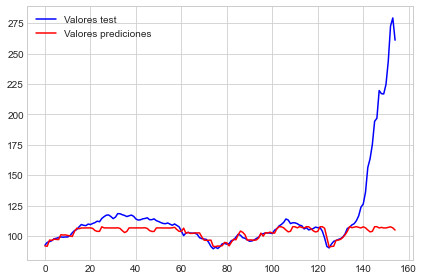

In [72]:
# Plot test and predictions values
plt.plot(list(y_test), color="blue", label="Valores test")
plt.plot(list(xgb_fcst), color="red", label="Valores prediciones")
plt.legend();

Applying a Bayesian Optimization to the xgboost

In [73]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
import random
random.seed(0)

xgb_opt = BayesSearchCV(
    XGBRegressor(),
    {
        'learning_rate': (10e-6, 1.0, 'log-uniform'),
        'max_depth': Integer(0, 50, 'uniform'),
        'n_estimators' : (10, 1000, 'log-uniform'),
    },
    n_iter=10,
    cv=3
)

xgb_opt.fit(X_train, y_train)
xgb_tuned_fcst = xgb_opt.best_estimator_.predict(X_test)

from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
print("MAE Test", mean_absolute_error(list(y_test), list(xgb_tuned_fcst)))
print("MAPE Test", mean_absolute_percentage_error(list(y_test), list(xgb_tuned_fcst)))
print("R2 Score Test", r2_score(list(y_test), list(xgb_tuned_fcst)))

MAE Test 13.635196572580645
MAPE Test 0.08016636550440831
R2 Score Test -0.05456587036148797


<h3 id="h3-lightgbm">CASE 4: LightGBM model</h3>

In [74]:
from lightgbm import LGBMRegressor
my_lgbm = LGBMRegressor()
my_lgbm.fit(X_train, y_train)

lgbm_fcst = my_lgbm.predict(X_test)

from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
print('Test --------------------')
print("MAE test", mean_absolute_error(list(y_test), list(lgbm_fcst)))
print("MAPE test", mean_absolute_percentage_error(list(y_test), list(lgbm_fcst)))
print("R2 Score test", r2_score(list(y_test), list(lgbm_fcst)))

lgbm_fcst_train = my_lgbm.predict(X_train)
print('Train --------------------')
print("MAE train", mean_absolute_error(list(y_train), list(lgbm_fcst_train)))
print("MAPE train", mean_absolute_percentage_error(list(y_train), list(lgbm_fcst_train)))
print("R2 Score train", r2_score(list(y_train), list(lgbm_fcst_train)))

Test --------------------
MAE test 17.03910374577992
MAPE test 0.11055627949165915
R2 Score test -0.15893622879337532
Train --------------------
MAE train 0.933162085245022
MAPE train 0.010801803396545693
R2 Score train 0.9870413288027807


Applying a Bayesian Optimization to the LightGBM

In [75]:
random.seed(0)
lgbm_opt = BayesSearchCV(
    LGBMRegressor(),
    {
        'learning_rate': (10e-6, 1.0, 'log-uniform'),
        'max_depth': Integer(-1, 50, 'uniform'),
        'n_estimators' : (10, 1000, 'log-uniform'),
    },
    n_iter=10,
    cv=3
)

lgbm_opt.fit(X_train, y_train)

lgbm_tuned_fcst = lgbm_opt.best_estimator_.predict(X_test)

from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
print("MAE", mean_absolute_error(list(y_test), list(lgbm_tuned_fcst)))
print("MAPE", mean_absolute_percentage_error(list(y_test), list(lgbm_tuned_fcst)))
print("R2 Score", r2_score(list(y_test), list(lgbm_tuned_fcst)))

MAE 16.099063999522556
MAPE 0.1041895032139632
R2 Score -0.08904922166358875


<span style="color:red">**XGBoost and LightGBM PREDICT BADLY. THEY DO NOT GENERALIZE**</span>

<h3 id="h3-ensemble">CASE 5: Ensemble with StandardScaler, PCA and XGBRegressor</h3>

In [80]:
# Import libraries
import sys

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

In [170]:
def Best_PCA_XGB_Regression(X_train, X_test, y_train, y_test, metric, 
                            list_maxComponents, list_n_estimators, list_max_depth, list_learning_rate):
    '''
    Function taking the data of train, test, type of metric, as well as the parameters of the PCA and
     XGBRegressor, and returns the optimal values of prediction, metric and best parameters.
    
    The parameters passed for:
        PCA: a list with the n_components
        XGBRegressor: a list with the n_estimators, a list with the max_depth, and another list with the learning_rate
    Arguments:
        X_train (DataFrame): Cointains the independents vars splitted for training
        X_test (DataFrame):  Cointains the independents vars splitted for test
        y_train (DataFrame): Cointains the dependents vars splitted for training
        y_test (DataFrame): Cointains the dependents vars splitted for test
        metric (str): name of the metric to use in the prediction.
             Possible values ['mae','mape','mse','r2_score']
        list_maxComponents (list): list with the n_components of the PCA
        list_n_estimators (list): list with the n_estimators of the XGBRegressor
        list_max_depth (list): list with the max_depth of the XGBRegressor
        list_learning_rate (list): list with the learning_rate of the XGBRegressor
        Examples:
            list_maxComponents = [ 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
            list_n_estimators = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
            list_max_depth = [5, 10, 15, 20, 25]
            list_learning_rate = [0.01, 0.1, 0.5, 0.75, 1, 1.25, 1.5]
    returns:
        y_pred (array): the optimal values of the prediction
        metric_Best (float): the optimal value of the metric for the given parameters
        n_components (int) the optimal n_components parameter of the PCA
        n_estimators (int): the optimal n_estimators parameter of the XGBRegressor
        max_depth (int): list with the max_depth of the XGBRegressor
        learning_rate (float): list with the learning_rate of the XGBRegressor
        scaler (StandardScaler): StandardScaler used to transform data to get the inverse transformation
    '''
    # To scale train and test data
    ss = StandardScaler()
    X_train_scaled = ss.fit_transform(X_train)
    X_test_scaled = ss.transform(X_test)

    n = 0 # For tracking the first time
    for componentsi in list_maxComponents:
        pca = PCA(n_components=componentsi, random_state=42)
        pca.fit(X_train_scaled)
        X_train_scaled_pca = pca.transform(X_train_scaled)
        X_test_scaled_pca = pca.transform(X_test_scaled)
        for n_estimatorsi in list_n_estimators:
            for max_depthi in list_max_depth:
                for learning_ratei in list_learning_rate:
                    xgb_reg = XGBRegressor(n_estimators=n_estimatorsi, max_depth=max_depthi, learning_rate=learning_ratei, random_state=42)
                    xgb_reg.fit(X_train_scaled_pca, y_train)
                    y_pred = xgb_reg.predict(X_test_scaled_pca)
                    if (n == 0): # The first time it initializes everything
                        if(metric == 'mae'):
                            metric_Best = mean_absolute_error(y_test, y_pred)
                        elif(metric == 'mape'):
                            metric_Best = mean_absolute_percentage_error(y_test, y_pred)
                        elif(metric == 'mse'):
                            metric_Best = mean_squared_error(y_test, y_pred)
                        elif(metric == 'r2_score'):
                            metric_Best = r2_score(y_test, y_pred)
                        else:
                            sys.exit('metric debe ser una de [\'mae\',\'mape\',\'mse\',\'r2_score\']')
                        n_estimators_Best = n_estimatorsi
                        max_depth_Best = max_depthi
                        learning_rate_Best = learning_ratei
                        max_components_Best = componentsi
                    else:
                        if(metric == 'mae'):
                            metric_New = mean_absolute_error(y_test, y_pred)
                        elif(metric == 'mape'):
                            metric_New = mean_absolute_percentage_error(y_test, y_pred)
                        elif(metric == 'mse'):
                            metric_New = mean_squared_error(y_test, y_pred)
                        elif(metric == 'r2_score'):
                            metric_New = r2_score(y_test, y_pred)
                        else:
                            sys.exit('metric debe ser una de [\'mae\',\'mape\',\'mse\',\'r2_score\']')

                        if (metric == 'mae') or (metric == 'mape') or (metric == 'mse'): # Minimize this metrics
                            if (metric_New < metric_Best):
                                metric_Best = metric_New
                                n_estimators_Best = n_estimatorsi
                                max_depth_Best = max_depthi
                                learning_rate_Best = learning_ratei
                                max_components_Best = componentsi
                        if (metric == 'r2_score'): # Maximize r2_score
                            if (metric_Best < metric_New):
                                metric_Best = metric_New
                                n_estimators_Best = n_estimatorsi
                                max_depth_Best = max_depthi
                                learning_rate_Best = learning_ratei
                                max_components_Best = componentsi
            n +=1
    return y_pred, metric_Best, max_components_Best, n_estimators_Best, max_depth_Best, learning_rate_Best


In [171]:
df3 = df.copy()
# Another way, setting lags number
n_lags = 12 
for i in range(n_lags,0,-1):
    df3['lag-'+str(i)] = df3['Producer_Prices_Energy_Domestic'].shift(i)
df3.drop(['Industrial_Production', 'Consumer_Price_Index', 'GDP'], inplace=True, axis=1)
df3.dropna(inplace=True)
df3


Producer_Prices_Energy_Domestic  lag-12  lag-11  lag-10  lag-9  \
date                                                                         
2001-01-31                             64.7    58.3    58.8    59.8   59.4   
2001-02-28                             64.9    58.8    59.8    59.4   60.6   
2001-03-31                             64.9    59.8    59.4    60.6   61.4   
2001-04-30                             65.2    59.4    60.6    61.4   62.3   
2001-05-31                             65.6    60.6    61.4    62.3   62.9   
...                                     ...     ...     ...     ...    ...   
2022-06-30                            224.6   116.6   123.7   126.3  136.1   
2022-07-31                            243.6   123.7   126.3   136.1  156.3   
2022-08-31                            272.6   126.3   136.1   156.3  163.5   
2022-09-30                            279.3   136.1   156.3   163.5  175.2   
2022-10-31                            261.0   156.3   163.5   175.2  194.3   

            lag-8  lag-7  lag-6  lag-5  lag-4  lag-3  lag-2  lag-1  
date                                                                
2001-01-31   60.6   61.4   62.3   62.9   65.5   66.8   67.0   65.2  
2001-02-28   61.4   62.3   62.9   65.5   66.8   67.0   65.2   64.7  
2001-03-31   62.3   62.9   65.5   66.8   67.0   65.2   64.7   64.9  
2001-04-30   62.9   65.5   66.8   67.0   65.2   64.7   64.9   64.9  
2001-05-31   65.5   66.8   67.0   65.2   64.7   64.9   64.9   65.2  
...           ...    ...    ...    ...    ...    ...    ...    ...  
2022-06-30  156.3  163.5  175.2  194.3  196.8  219.6  217.0  216.8  
2022-07-31  163.5  175.2  194.3  196.8  219.6  217.0  216.8  224.6  
2022-08-31  175.2  194.3  196.8  219.6  217.0  216.8  224.6  243.6  
2022-09-30  194.3  196.8  219.6  217.0  216.8  224.6  243.6  272.6  
2022-10-31  196.8  219.6  217.0  216.8  224.6  243.6  272.6  279.3  

[262 rows x 13 columns]

In [172]:
from sklearn.model_selection import train_test_split

list_maxComponents = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
list_n_estimators = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
list_max_depth = [5, 10, 15, 20, 25]
list_learning_rate = [0.01, 0.1, 0.5, 0.75, 1, 1.25, 1.5]
metric = 'r2_score'


X = df3.drop('Producer_Prices_Energy_Domestic',1)
y = df3['Producer_Prices_Energy_Domestic']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

y_pred, metric_Best, max_components_Best, n_estimators_Best, max_depth_Best, learning_rate_Best = \
                                Best_PCA_XGB_Regression(X_train, X_test, y_train, y_test, metric, \
                                list_maxComponents, list_n_estimators, list_max_depth, list_learning_rate)


print('metric_Best', metric_Best, 
      'max_components_Best', max_components_Best,
      'n_estimators', n_estimators_Best, 
      'max_depth', max_depth_Best,
      'learning_rate', learning_rate_Best)


metric_Best 0.9738495358696567 max_components_Best 2 n_estimators 12 max_depth 25 learning_rate 1


In [173]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


pipeline = Pipeline(steps = [
    ("scaler", StandardScaler()), # First the scaler
    ("pca", PCA()), # Second PCA PCA 
    ("xGBRegressor", XGBRegressor()) # Third process a XGBRegressor
])

pipeline_param = {
    'pca__n_components' :  [2],
    'pca__random_state' :  [42],
    'xGBRegressor__n_estimators' :  [12],
    'xGBRegressor__max_depth' :  [25],   
    'xGBRegressor__learning_rate' :  [1]
}

search = GridSearchCV(pipeline, pipeline_param, cv=5).fit(X_train, y_train)

print("Train: coefficient of determination:", search.best_estimator_.score(X_train, y_train))
print("Test: coefficient of determination:", search.best_estimator_.score(X_test, y_test))


Train: Coeficiente de determinacion de la predicción: 0.9999999919913835
Test: Coeficiente de determinacion de la predicción: 0.9738495358696567


In [177]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
print('Test --------------------')
testPredict = search.best_estimator_.predict(X_test)
print("MAE test", mean_absolute_error(list(y_test), list(testPredict)))
print("MAPE test", mean_absolute_percentage_error(list(y_test), list(testPredict)))
print("R2 Score test", r2_score(list(y_test), list(testPredict)))

trainPredict = search.best_estimator_.predict(X_train)
print('Train --------------------')
print("MAE train", mean_absolute_error(list(y_train), list(trainPredict)))
print("MAPE train", mean_absolute_percentage_error(list(y_train), list(trainPredict)))
print("R2 Score train", r2_score(list(y_train), list(trainPredict)))


Test --------------------
MAE test 3.278363080294627
MAPE test 0.029756805740687845
R2 Score test 0.9738495358696567
Train --------------------
MAE train 0.0013147564025589931
MAPE train 1.2031582793703684e-05
R2 Score train 0.9999999919913835


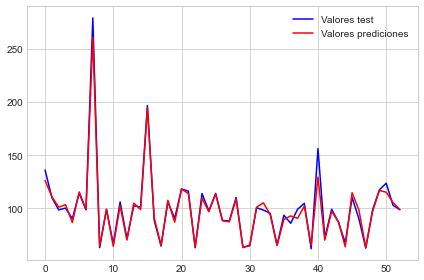

In [178]:
# Plot test and predictions values
plt.plot(list(y_test), color="blue", label="Valores test")
plt.plot(list(testPredict), color="red", label="Valores prediciones")
plt.legend();

In [165]:
#
# To predict next month dates. Note: data is shuffled before splitting, thus train test data is not ordered!
#

from datetime import datetime
from dateutil.relativedelta import relativedelta

def Get_Next_Predictions(num_predictions=12):

    df_predictions = pd.DataFrame(columns=['date', 'prediction'])

    date_after_last_month = df3.tail(1).index[0] + relativedelta(months=1)
    # print('Next month: ', date_after_last_month.strftime('%Y-%m-%d'))
    
    last_date = df3.tail(1).index[0]
    # print('Last month: ', last_date.strftime('%Y-%m-%d'))
    last_y_toPredict = df3.loc[last_date.strftime('%Y-%m'), 'Producer_Prices_Energy_Domestic'].values[0]
    new_X = df3.loc[last_date.strftime('%Y-%m'), ['lag-12', 'lag-11', 'lag-10', 'lag-9', 'lag-8', 'lag-7', 'lag-6', 'lag-5', 'lag-4', 'lag-3', 'lag-2', 'lag-1']].copy()

    # print('last_y_toPredict', last_y_toPredict)
    # print(new_X.to_markdown())
    # print(240 * 'X')

    for i in range(num_predictions):
        next_date = last_date + relativedelta(months=1)
        new_X.set_axis([next_date.strftime('%Y-%m-%d')], axis=0, inplace=True)
        # Anothe way, setting lags number
        n_lags = 12 # Numero de lags
        for i in range(n_lags,1,-1):
            new_X['lag-'+str(i)] = new_X['lag-'+str(i-1)]
        new_X['lag-1'] = last_y_toPredict
        # print(new_X.to_markdown())
        predicted = search.best_estimator_.predict(new_X)
        # print('Predicted for ', next_date.strftime('%Y-%m-%d'), ' = ', predicted[0])
        # print(240 * '*')
        last_date = next_date
        last_y_toPredict = predicted

        row1 = pd.Series([next_date, predicted[0]], index=df_predictions.columns)
        df_predictions = df_predictions.append(row1,ignore_index=True) 
    return df_predictions


df_predictions = Get_Next_Predictions(14)
df_predictions

date  prediction
0  2022-11-30  260.996521
1  2022-12-30  163.522476
2  2023-01-30  163.522476
3  2023-02-28  163.522476
4  2023-03-28  163.522476
5  2023-04-28  163.522476
6  2023-05-28  163.522476
7  2023-06-28  163.522476
8  2023-07-28  163.522476
9  2023-08-28  163.522476
10 2023-09-28  175.099808
11 2023-10-28  175.099808
12 2023-11-28  146.299377
13 2023-12-28  119.980186

In [257]:
def plot_compare2(predicted, forecasted, df, len_train):
    plt.figure(figsize=(15,4))
    plt.title("Ground truth, prediction, and forecasted together",fontsize=18)

    plt.plot(df.index.values,df,c='blue')  # Real Values
    plt.plot(predicted.index.values,predicted,c='orange',alpha=0.75)  # Predicted Values
    plt.plot(forecasted.index.values,forecasted,c='green')  # Predicted Values

    plt.legend(['True data','Predicted', 'Forecasted'],fontsize=15)
    plt.axvline(predicted.index[len_train -1], c="r")
    plt.axvline(predicted.index[len(df) -1], c="r")
    plt.grid(True)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

In [213]:
predict_test = pd.Series(testPredict, index=X_test.index)
predict_test

DatetimeIndex(['2021-09-30', '2018-12-31', '2017-03-31', '2015-01-31',
               '2006-07-31', '2012-06-30', '2015-08-31', '2022-09-30',
               '2001-10-31', '2010-07-31', '2003-01-31', '2019-10-31',
               '2004-11-30', '2018-03-31', '2017-01-31', '2022-02-28',
               '2007-08-31', '2001-07-31', '2018-06-30', '2006-08-31',
               '2012-09-30', '2013-03-31', '2002-08-31', '2018-10-31',
               '2010-04-30', '2013-07-31', '2007-07-31', '2006-09-30',
               '2008-07-31', '2002-04-30', '2003-07-31', '2017-02-28',
               '2020-03-31', '2010-02-28', '2003-10-31', '2016-06-30',
               '2007-02-28', '2020-11-30', '2018-05-31', '2001-11-30',
               '2021-10-31', '2004-10-31', '2010-10-31', '2007-04-30',
               '2003-02-28', '2014-04-30', '2020-05-31', '2002-07-31',
               '2008-03-31', '2012-10-31', '2021-07-31', '2015-03-31',
               '2010-06-30'],
              dtype='datetime64[ns]', name='dat

In [215]:
predict_train = pd.Series(trainPredict, index=X_train.index)
predict_train

date
2015-12-31    94.799446
2010-08-31    98.997879
2009-01-31    93.499702
2020-06-30    93.299660
2006-01-31    84.804642
                ...    
2002-09-30    63.700378
2016-09-30    93.699898
2006-12-31    86.101990
2009-11-30    92.399384
2009-07-31    90.299957
Length: 209, dtype: float32

In [223]:
forecasted = pd.Series(df_predictions['prediction'].values, index=df_predictions['date'])
forecasted

date
2022-11-30    260.996521
2022-12-30    163.522476
2023-01-30    163.522476
2023-02-28    163.522476
2023-03-28    163.522476
2023-04-28    163.522476
2023-05-28    163.522476
2023-06-28    163.522476
2023-07-28    163.522476
2023-08-28    163.522476
2023-09-28    175.099808
2023-10-28    175.099808
2023-11-28    146.299377
2023-12-28    119.980186
dtype: float32

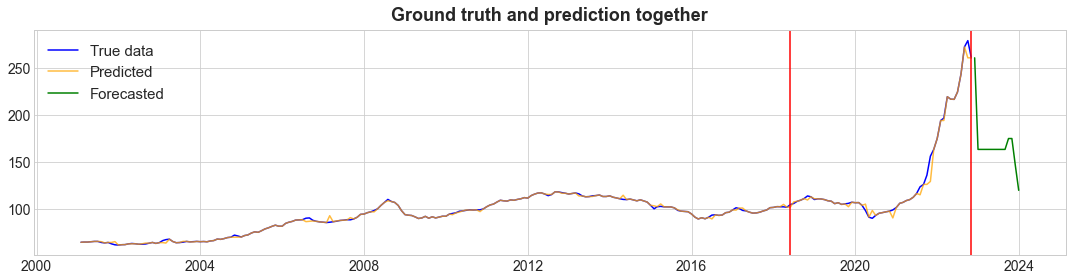

In [241]:
predicted = pd.concat((predict_train,predict_test),axis=0).sort_index(ascending = True) # Concateno lo predicho de train y test para visualizarlo
plot_compare2(predicted, forecasted, df3['Producer_Prices_Energy_Domestic'], len(predict_train))


In [238]:
predicted

date
2001-01-31     64.700455
2001-02-28     64.899002
2001-03-31     64.899765
2001-04-30     65.199677
2001-05-31     65.600029
                 ...    
2022-06-30    224.591019
2022-07-31    243.600159
2022-08-31    272.573853
2022-09-30    260.996521
2022-10-31    260.996521
Length: 262, dtype: float32

In [239]:
forecasted

date
2022-11-30    260.996521
2022-12-30    163.522476
2023-01-30    163.522476
2023-02-28    163.522476
2023-03-28    163.522476
2023-04-28    163.522476
2023-05-28    163.522476
2023-06-28    163.522476
2023-07-28    163.522476
2023-08-28    163.522476
2023-09-28    175.099808
2023-10-28    175.099808
2023-11-28    146.299377
2023-12-28    119.980186
dtype: float32

In [218]:
df3['Producer_Prices_Energy_Domestic']

date
2001-01-31     64.7
2001-02-28     64.9
2001-03-31     64.9
2001-04-30     65.2
2001-05-31     65.6
              ...  
2022-06-30    224.6
2022-07-31    243.6
2022-08-31    272.6
2022-09-30    279.3
2022-10-31    261.0
Name: Producer_Prices_Energy_Domestic, Length: 262, dtype: float64

<h2 id="h2-advancedmldl">F.3.- --- ADVANCED MACHINE AND DEEP LEARNING MODELS ---</h2>

We will move on to using multiple types of advanced Machine Learning and Deep Learning models. The issue is really similar to the way that classical supervised machine learning models work: there are input variables and one (or multiple) target variable(s).

As the time series models are more appropiate as the time series part is more present than the external variables part. We will only use the target var lagged. 

Thus, once the best hyperparameters are calculated for our model, we can use lags1..lags12 to predict one lag in the future. 

<h3 id="h3-cnnlstm">CASE 6: Combining CNN with Long Short-Term Memory (LSTM)</h3>

LSTMs as a third and last type of RNN cell are even more advanced than the GRU cell.

The SimpleRNN cell allows having recurrent architectures, by adding a feedback loop between consecutive values. It therefore is an improvement on “simple” feedforward cells that do not allow for this. A problem with the SimpleRNN is the longer-term trends, which you could call a
longer-term memory. 

The GRU cell is an improvement on the SimpleRNN that adds a weight to the cell that serves to learn longer-term processes.

The LSTM cell adds long-term memory in an even more performant way because it allows even more parameters to be learned. This makes it the most powerful RNN to do forecasting, especially when you have a longer-term trend in your data. 

LSTMs are one of the state-of-the-art models for forecasting at this moment.

In [167]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import Callback


# from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
# from tensorflow.keras.optimizers import RMSprop
# from tensorflow.keras.callbacks import Callback

'''
It shows a message if the epoch is a multiple of 50 and the training has not finished.
Every time an epoch ends, keras calls on_epoch_end()
'''
class MyCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if (epoch+1) % 50 == 0 and epoch>0:
            print("Epoch number {} done".format(epoch+1))

'''
embedding is the amount of lags used
default embedding=emb_size define above
'''
def build_simple_rnn(num_units=128, num_dense=32, embedding=4,lr=0.001):
    """
    Builds and compiles a simple RNN model
    Arguments:
              num_units: Number of units of a the simple RNN layer
              embedding: Embedding length
              num_dense: Number of neurons in the dense layer followed by the RNN layer
              lr: Learning rate (uses RMSprop optimizer)
    Returns:
              A compiled Keras model.
    """
    model = Sequential() # Sequential groups a linear stack of layers into a tf.keras.Model
    #
    # A Long short term memory (LSTM) neural network for univariate time series forecasting.
    #
    # This is LSTM input layer with num_units layer with its activation function "relu"
    # To provide the shape of the input samples, as trainX.shape = (#rows, 1, embedding), then the input_shape = (1, embedding)
    model.add(LSTM(units=num_units, input_shape=(1,embedding), activation="relu")) # 1 input time steps and a number of embeding features.
    model.add(Dense(num_dense, activation="relu")) # The second layer would have num_dense=32 cells with its activation function "relu"
    model.add(Dense(1)) # The output layer is a neuron in regression (as is the case), also in binary classification.
                        # The output layer in multiclass classification in number of classes
    model.compile(loss='mean_squared_error', # Using MSE
                  #optimizer=RMSprop(lr=lr),
                  optimizer='adam', # We minimize the error with an 'adam' optimizer 
                  metrics=['mse'])
    
    return model

def predictions(model,trainX,testX):
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    predicted = np.concatenate((trainPredict,testPredict),axis=0)
    
    return predicted

def plot_compare(predicted, df, lenTrain):
    index = df.index.values
    plt.figure(figsize=(15,4))
    plt.title("Ground truth and prediction together",fontsize=18)

    plt.plot(index,df,c='blue')  # Real values
    plt.plot(index,predicted,c='orange',alpha=0.75)  # Predicted values

    plt.legend(['True data','Predicted'],fontsize=15)
    plt.axvline(df.index[lenTrain], c="r")
    plt.grid(True)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

def prepare_data(df, step, train_size):
    aux_df = df.copy()
    emb_size = step
    for i in range(1, emb_size+1):
        aux_df['lag' + str(i)] = aux_df['value'].shift(i)

    aux_df.dropna(inplace=True)
    #aux_df.reset_index(drop=True, inplace=True)

    values = aux_df.values

    trainX,trainY = values[:train_size,1:],values[:train_size,0],
    testX,testY = values[train_size:,1:], values[train_size:,0]
    
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    
    return trainX,testX,trainY,testY,aux_df

# Retorna MAPE
def errors(testX, testY):
    y_true = testY
    y_pred = model.predict(testX)
    return mean_absolute_percentage_error(y_true=y_true, y_pred=y_pred)


In [28]:
import os
####*IMPORANT*: Have to do this line *before* importing tensorflow
os.environ['PYTHONHASHSEED']=str(1)

import tensorflow as tf
import random
import pandas as pd
import numpy as np

def reset_random_seeds():
   os.environ['PYTHONHASHSEED']=str(1)
   tf.random.set_seed(1)
   np.random.seed(1)
   random.seed(1)


Find best hyperparameter. **Note: it takes time to execute !!!!!!!!!!!!!!!!**

In [ ]:
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
# os.environ['AUTOGRAPH_VERBOSITY'] = 10

# Producer_Prices_Energy_Domestic
data = pd.DataFrame()
data['value'] = df['Producer_Prices_Energy_Domestic']
data.reset_index(inplace = True)
data.drop('date', axis=1, inplace = True)

# Split train and test. 41% for train
train_len = (int)(0.41 * len(data))
test_len = len(data) - train_len

best_steps_embeddings = 0
best_num_epochs = 0
best_batch_size = 0
i = 0
for steps_embeddings in [2,4,6,8,10,12]: # Up to the number of possible lags here 12 because they are monthly data
        for num_epochs in [5, 15, 10, 50, 100,200,300,400,500, 1000]:
                for batch_size in [4,8,16,32,64]:
                        trainX,testX,trainY,testY,df4 = prepare_data(data, steps_embeddings, train_len)
                        model = build_simple_rnn(num_units=32,num_dense=8,embedding=steps_embeddings)

                        reset_random_seeds()
                        #model.save("my_model.h5")

                        model.fit(trainX,trainY, 
                                epochs=num_epochs, 
                                batch_size=batch_size,
                                # callbacks=[MyCallback()],
                                verbose=0)

                        preds = predictions(model,trainX,testX)
                        print("Embedding size: {}".format(steps_embeddings))
                        mape_errors = errors(testX, testY)
                        if i == 0: 
                                best_mape_errors = mape_errors
                                best_steps_embeddings = steps_embeddings
                                best_num_epochs = num_epochs
                                best_batch_size = batch_size
                        elif (mape_errors < best_mape_errors):
                                best_mape_errors = mape_errors
                                best_steps_embeddings = steps_embeddings
                                best_num_epochs = num_epochs
                                best_batch_size = batch_size
        i=+1

# plot_compare(preds, df4['value'], len(trainX))
# print()


In [30]:
# Print the best hyperparameters values
print("-"*100)
print("Best MAPE:", best_mape_errors) 
print("Best Step/Embeddings:", best_steps_embeddings)
print("Best Number of Epoch:", best_num_epochs)
print("Best Batch Size:", best_batch_size)
print("-"*100)


----------------------------------------------------------------------------------------------------
Best MAPE: 0.015907771690662795
Best Step/Embeddings: 4
Best Number of Epoch: 1000
Best Batch Size: 32
----------------------------------------------------------------------------------------------------


Execute with best hyperparameters calculated
- Best MAPE: 0.015907771690662795
- Best Step/Embeddings: 4
- Best Number of Epoch: 1000
- Best Batch Size: 32

In [132]:
# Producer_Prices_Energy_Domestic
data = pd.DataFrame()
data['value'] = df['Producer_Prices_Energy_Domestic']
# data.reset_index(inplace = True)
# data.drop('date', axis=1, inplace = True)

# apply a min max scaler
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# data = pd.DataFrame(scaler.fit_transform(data), columns = ['value'])

# Split train and test. 41% for train
train_len = (int)(0.41 * len(data))
test_len = len(data) - train_len

# We initialize with the best steps_embeddings, num_epochs y batch_size
steps_embeddings = 4
num_epochs = 1000
batch_size = 32

trainX,testX,trainY,testY,df4 = prepare_data(data, steps_embeddings, train_len)
model = build_simple_rnn(num_units=32,num_dense=8,embedding=steps_embeddings)

reset_random_seeds()
#model.save("my_model.h5")

model.fit(trainX,trainY, 
        epochs=num_epochs, 
        batch_size=batch_size,
        # callbacks=[MyCallback()],
        verbose=0)

trainPredict = model.predict(trainX) # We obtain the predictions for train
testPredict = model.predict(testX) # We obtain the predictions for test
predicted = np.concatenate((trainPredict,testPredict),axis=0) # TTo obtain the whole predited time series

print('Test --------------------')
print("MAE test", mean_absolute_error(testY, testPredict))
print("MAPE test", mean_absolute_percentage_error(testY, testPredict))
print("R2 Score test", r2_score(testY, testPredict))

print('Train --------------------')
print("MAE train", mean_absolute_error(trainY, trainPredict))
print("MAPE train", mean_absolute_percentage_error(trainY, trainPredict))
print("R2 Score train", r2_score(trainY, trainPredict))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

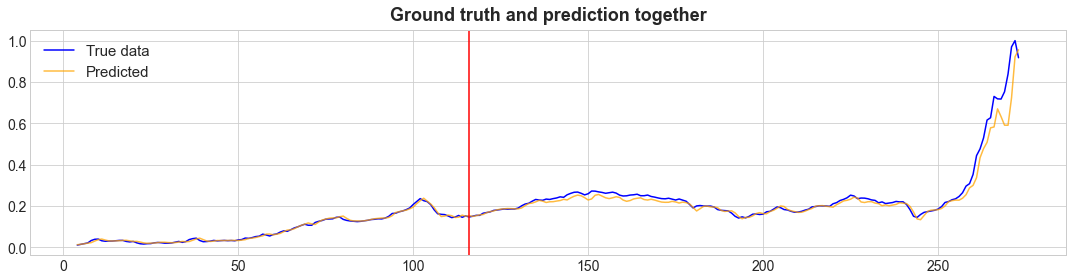

In [133]:
plot_compare(predicted, df4['value'], len(trainX))

In [80]:
# Parameters LSTM: 
# Layer LSTM = 4 * [(n * m) + (n**2) + n)] being n = nº neurons (here 32) and m = embeddings (here 4)
print('First Layer Params', 4 * (32 * 4 + 32 **2 + 32))
model.summary()


First Layer Params 4736
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4736      
                                                                 
 dense (Dense)               (None, 8)                 264       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 5,009
Trainable params: 5,009
Non-trainable params: 0
_________________________________________________________________


<span style="color:red">**LSTM provides similar result to SARIMAX, though SARIMAX is better**</span>

<h3 id="h3-rnn">CASE 7: Recurrent Neural Networks (RNN): SimpleRNN, GRU, and LSTM</h3>

There are three very common versions of Recurrent Neural Networks (RNN): 
- SimpleRNN (Simple Recurrent Neural Networks (RNN), 
- GRU (Gated Recurrent Unit), and 
- LSTM (Long Short Term Memory). 

#### Specific Data Prep Needs for a NN
- Scaling and Standardization: A neural network will not be able to learn if you do not standardize the input data. A standard scaler maps a variable to follow a standard normal
distribution. The MinMax scaler brings a variable into the range of 0–1.

#### Callbacks - Early Stopping

In [119]:
from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(patience=20)

#### Preparation of Data (to be reused by the different RNN models)

In [111]:

# Retain only price
# Producer_Prices_Energy_Domestic
data = pd.DataFrame()
data['value'] = df['Producer_Prices_Energy_Domestic']

# apply a min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns = ['value'])

# convert to windowed data sets
ylist = list(data['value'])

# We need to split the data into a shape in which we have sequences of past data and 
# sequences of future data. We want to predict 72 lags/steps (72 # times 10 minutes) 
# into the future, and we’ll use 3*72 steps into the past. 
# This is an arbitrary choice, and please feel free to try out using more or less past data. 
# The code in Listing 17-4 loops through the data and creates sequences for the model training.

# Split train and test. 41% for train
# train_size = 0.41
train_size = 0.77
test_size = 1 - train_size
train_len = (int)(train_size * len(data))
test_len = len(data) - train_len

n_future = 1 * 12
n_past = 3 * 12
total_period = n_future + n_past

idx_end = len(ylist)
idx_start = idx_end - total_period

X_new = []
y_new = []
while idx_start > 0:
  x_line = ylist[idx_start:idx_start+n_past]
  y_line = ylist[idx_start+n_past:idx_start+total_period]

  X_new.append(x_line)
  y_new.append(y_line)

  idx_start = idx_start - 1

import numpy as np
X_new = np.array(X_new)
y_new = np.array(y_new)

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=test_size, random_state=42)

# reshape data into the right format for RNNs
n_samples = X_train.shape[0]
n_timesteps = X_train.shape[1]
n_steps = y_train.shape[1]
n_features = 1

X_train_rs = X_train.reshape(n_samples, n_timesteps, n_features )
X_test_rs = X_test.reshape(X_test.shape[0], n_timesteps, n_features )

<h4 id="h4-rnn1">CASE 7.1: RNN with one LTSM layer</h4>

In [123]:
import random

from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import Callback
random.seed(42)

# My example
num_units = 128
num_epochs = 1000
batch_size = 16

# Original
# num_units = 8
# num_epochs = 5
# batch_size = 32


simple_model = Sequential([
  LSTM(num_units, activation='tanh',input_shape=(n_timesteps, n_features)),
  Dense(y_train.shape[1]),
])

simple_model.summary()

simple_model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
  metrics=['mean_absolute_error'],
)

smod_history = simple_model.fit(X_train_rs, y_train,
          validation_split=0.2,
          epochs=num_epochs,
          batch_size=batch_size,
          shuffle = True,
#          callbacks = [earlystop],
          verbose=0 # Do not provide msgs on the screen
)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 128)               66560     
                                                                 
 dense_15 (Dense)            (None, 12)                1548      
                                                                 
Total params: 68,108
Trainable params: 68,108
Non-trainable params: 0
_________________________________________________________________
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) an

Test --------------------
MAE test 0.0054878836329423425
MAPE test 0.03661545403047559
R2 Score test 0.9753410583150063
Train --------------------
MAE train 0.004046803723301055
MAPE train 0.026039932045982126
R2 Score train 0.9956389002618412


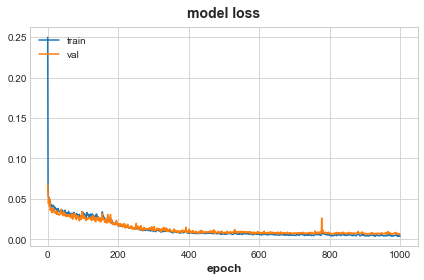

In [131]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from matplotlib import pyplot as plt, style # for ploting

trainPredict = simple_model.predict(X_train_rs) # To get train predictions
testPredict = simple_model.predict(X_test_rs) # # To get test predictions

print('Test --------------------')
print("MAE test", mean_absolute_error(y_test, testPredict))
print("MAPE test", mean_absolute_percentage_error(y_test, testPredict))
print("R2 Score test", r2_score(y_test, testPredict))

print('Train --------------------')
print("MAE train", mean_absolute_error(y_train, trainPredict))
print("MAPE train", mean_absolute_percentage_error(y_train, trainPredict))
print("R2 Score train", r2_score(y_train, trainPredict))

plt.plot(smod_history.history['loss'])
plt.plot(smod_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

<h4 id="h4-rnn2">CASE 7.2: RNN with three-layer LSTM</h4>

In [121]:
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import Callback

random.seed(42)

# My example
batch_size = 16
num_epochs = 1000
num_units = 128

# Original
# num_epochs = 10
# batch_size = 32
# num_units = 64

simple_model = Sequential([
  LSTM(num_units, activation='tanh',input_shape=(n_timesteps, n_features), return_sequences=True),
  LSTM(num_units, activation='tanh', return_sequences=True),
  LSTM(num_units, activation='tanh'),
  Dense(y_train.shape[1]),
])

simple_model.summary()

simple_model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
  loss='mean_absolute_error',
  metrics=['mean_absolute_error'],
)

smod_history = simple_model.fit(X_train_rs, y_train,
          validation_split=0.2,
          epochs=num_epochs,
          batch_size=batch_size,
#          callbacks = [earlystop],
          verbose = 0, # Do not send msgs on the screen
          shuffle = True
)

preds = simple_model.predict(X_test_rs)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_25 (LSTM)              (None, 36, 128)           66560     
                                                                 
 lstm_26 (LSTM)              (None, 36, 128)           131584    
                                                                 
 lstm_27 (LSTM)              (None, 128)               131584    
                                                                 
 dense_14 (Dense)            (None, 12)                1548      
                                                                 
Total params: 331,276
Trainable params: 331,276
Non-trainable params: 0
_________________________________________________________________
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' 

Test --------------------
MAE test 0.00445939835240067
MAPE test 0.029575260860065924
R2 Score test 0.9919882823131264


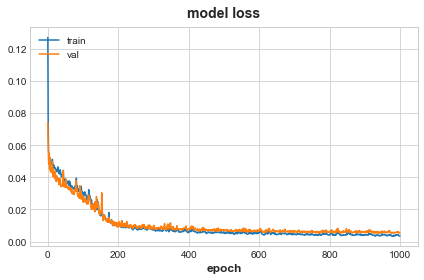

In [122]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from matplotlib import pyplot as plt, style # for ploting

trainPredict = simple_model.predict(X_train_rs) # To get train predictions
testPredict = simple_model.predict(X_test_rs) # To get test predictions

print('Test --------------------')
print("MAE test", mean_absolute_error(y_test, testPredict))
print("MAPE test", mean_absolute_percentage_error(y_test, testPredict))
print("R2 Score test", r2_score(y_test, testPredict))

print('Train --------------------')
print("MAE train", mean_absolute_error(y_train, trainPredict))
print("MAPE train", mean_absolute_percentage_error(y_train, trainPredict))
print("R2 Score train", r2_score(y_train, trainPredict))

plt.plot(smod_history.history['loss'])
plt.plot(smod_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

<h4 id="h4-rnn3">CASE 7.3: Gated Recurrent Unit (GRU) with 3 layers</h4>

In [135]:
from tensorflow.keras.layers import Dense, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import Callback
random.seed(42)

# My example
batch_size = 16
num_epochs = 1000
num_units = 128

# Original
# num_epochs = 10
# batch_size = 32
# num_units = 64

simple_model = Sequential([
    GRU(num_units, activation='tanh',input_shape=(n_timesteps, n_features), return_sequences=True),
    GRU(num_units, activation='tanh', return_sequences=True),
    GRU(num_units, activation='tanh'),
    Dense(y_train.shape[1]),
])

simple_model.summary()

simple_model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
  loss='mean_absolute_error',
  metrics=['mean_absolute_error'],
)

smod_history = simple_model.fit(X_train_rs, y_train,
          validation_split=0.2,
          epochs=num_epochs,
          batch_size=batch_size,
#          callbacks = [earlystop],
          verbose = 0, # Do not send msgs on the screen
          shuffle = True
)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 36, 128)           50304     
                                                                 
 gru_4 (GRU)                 (None, 36, 128)           99072     
                                                                 
 gru_5 (GRU)                 (None, 128)               99072     
                                                                 
 dense_19 (Dense)            (None, 12)                1548      
                                                                 
Total params: 249,996
Trainable params: 249,996
Non-trainable params: 0
_________________________________________________________________
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' 

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Test --------------------
MAE test 0.006592734231224473
MAPE test 0.04582122409836148
R2 Score test 0.9731314084095524
Train --------------------
MAE train 0.004305331838229369
MAPE train 0.027087943620918722
R2 Score train 0.9956897301177801


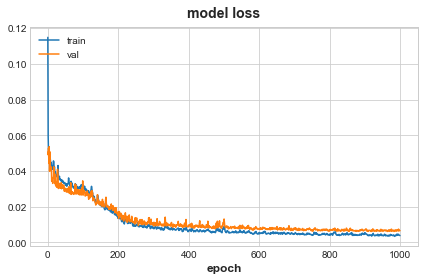

In [136]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from matplotlib import pyplot as plt, style # for ploting

trainPredict = simple_model.predict(X_train_rs) # To get train predictions
testPredict = simple_model.predict(X_test_rs) # To get test predictions

print('Test --------------------')
print("MAE test", mean_absolute_error(y_test, testPredict))
print("MAPE test", mean_absolute_percentage_error(y_test, testPredict))
print("R2 Score test", r2_score(y_test, testPredict))

print('Train --------------------')
print("MAE train", mean_absolute_error(y_train, trainPredict))
print("MAPE train", mean_absolute_percentage_error(y_train, trainPredict))
print("R2 Score train", r2_score(y_train, trainPredict))

plt.plot(smod_history.history['loss'])
plt.plot(smod_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

<h4 id="h4-rnn4">CASE 7.4: three layers of SimpleRNN</h4>

In [137]:
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import Callback
random.seed(42)

# My example
batch_size = 16
num_epochs = 1000
num_units = 128

# Original
# num_epochs = 10
# batch_size = 32
# num_units = 64
random.seed(42)

simple_model = Sequential([
  SimpleRNN(num_units, activation='tanh',input_shape=(n_timesteps, n_features), return_sequences=True),
  SimpleRNN(num_units, activation='tanh', return_sequences = True),
  SimpleRNN(num_units, activation='tanh'),
  Dense(y_train.shape[1]),
])

simple_model.summary()

simple_model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
  loss='mean_absolute_error',
  metrics=['mean_absolute_error'],
)

smod_history = simple_model.fit(X_train_rs, y_train,
          validation_split=0.2,
          epochs=num_epochs,
          batch_size=batch_size,
#          callbacks = [earlystop],
          verbose = 0, # Do not send msms on the screen
          shuffle = True
)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 36, 128)           16640     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 36, 128)           32896     
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 128)               32896     
                                                                 
 dense_20 (Dense)            (None, 12)                1548      
                                                                 
Total params: 83,980
Trainable params: 83,980
Non-trainable params: 0
_________________________________________________________________
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' ob

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Test --------------------
MAE test 0.02459216166511009
MAPE test 0.1865513883725878
R2 Score test 0.7659690631715139
Train --------------------
MAE train 0.031198113739106012
MAPE train 0.17750799553495333
R2 Score train 0.7859568958971518


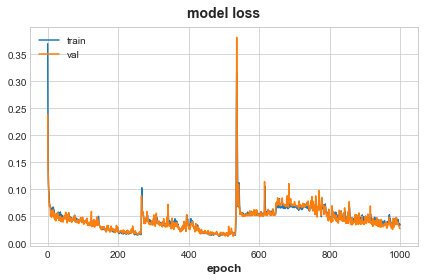

In [138]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from matplotlib import pyplot as plt, style # for ploting

trainPredict = simple_model.predict(X_train_rs) # To get train predictions
testPredict = simple_model.predict(X_test_rs) # To get test predictions

print('Test --------------------')
print("MAE test", mean_absolute_error(y_test, testPredict))
print("MAPE test", mean_absolute_percentage_error(y_test, testPredict))
print("R2 Score test", r2_score(y_test, testPredict))

print('Train --------------------')
print("MAE train", mean_absolute_error(y_train, trainPredict))
print("MAPE train", mean_absolute_percentage_error(y_train, trainPredict))
print("R2 Score train", r2_score(y_train, trainPredict))

plt.plot(smod_history.history['loss'])
plt.plot(smod_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

<h3 id="h3-prophet">CASE 8: Prophet</h3>

It is not exactly a model, but rather an automated procedure for building forecasting models.

<h4 id="h4-prophetwithouttransformation">CASE 8.1: Prophet without Transformation</h4>

In [193]:
# import warnings
# warnings.filterwarnings('ignore')

# import numpy as np
# import pandas as pd
# from scipy import stats
# import statsmodels.api as sm
# import matplotlib.pyplot as plt

# %matplotlib inline

In [221]:
data = pd.DataFrame()
data['value'] = df['Producer_Prices_Energy_Domestic']
#data.reset_index(inplace = True)
#data.drop('date', axis=1, inplace = True)
data

value
date             
2000-01-31   58.3
2000-02-29   58.8
2000-03-31   59.8
2000-04-30   59.4
2000-05-31   60.6
...           ...
2022-06-30  224.6
2022-07-31  243.6
2022-08-31  272.6
2022-09-30  279.3
2022-10-31  261.0

[274 rows x 1 columns]

In [222]:
from plotly.offline import init_notebook_mode, iplot
from plotly import graph_objs as go

# Initialize plotly
init_notebook_mode(connected=True)

In [223]:
def plotly_df(df, title=''):
    """Visualize all the dataframe columns as line plots."""
    common_kw = dict(x=df.index, mode='lines')
    data = [go.Scatter(y=df[c], name=c, **common_kw) for c in df.columns]
    layout = dict(title=title)
    fig = dict(data=data, layout=layout)
    iplot(fig, show_link=False)


In [224]:
plotly_df(data, title='Producer Prices for Domestic Energy Markets (montly)')

In [225]:
import logging

from prophet import Prophet

logging.getLogger().setLevel(logging.ERROR)

In [226]:
data.reset_index(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    274 non-null    datetime64[ns]
 1   value   274 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.4 KB


In [227]:
# The input to the method `fit` is a `DataFrame` with two columns:
data.columns = ['ds', 'y']

In [228]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      274 non-null    datetime64[ns]
 1   y       274 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.4 KB


In [245]:
data

ds      y
0   2000-01-31   58.3
1   2000-02-29   58.8
2   2000-03-31   59.8
3   2000-04-30   59.4
4   2000-05-31   60.6
..         ...    ...
269 2022-06-30  224.6
270 2022-07-31  243.6
271 2022-08-31  272.6
272 2022-09-30  279.3
273 2022-10-31  261.0

[274 rows x 2 columns]

In [250]:
# Split train and test. 41% for train
train_len = (int)(0.41 * len(data))
test_len = len(data) - train_len

train_df = data[:train_len]

In [251]:
m = Prophet() # To create a new Prophet object
m.fit(train_df); # Train the model

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [254]:
# Create a dataframe which will contain all dates from the history and 
# also extend into the future for those test_len months that we left out before.
#
# We define the freq = 'M' month end, as our ds is of type datetime64[ns] at month end
# include_history = True for cmp_df below 
future = m.make_future_dataframe(periods=test_len, freq = 'M', include_history = True) 
#future = m.make_future_dataframe(periods=test_len, include_history = True) 

In [255]:
forecast = m.predict(future)    # We predict values with `Prophet` by passing in the dates for which we want to create a forecast
                                # The forecast itself is stored in the `yhat` column.
forecast.tail(n=3)


ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
271 2022-08-31  186.412099  160.987124  213.953430   160.387819   212.696775   
272 2022-09-30  186.928014  161.187361  215.592518   160.596653   213.356330   
273 2022-10-31  187.461126  161.785858  216.709025   160.834482   214.196128   

     additive_terms  additive_terms_lower  additive_terms_upper    yearly  \
271        1.311058              1.311058              1.311058  1.311058   
272        0.982460              0.982460              0.982460  0.982460   
273        0.689651              0.689651              0.689651  0.689651   

     yearly_lower  yearly_upper  multiplicative_terms  \
271      1.311058      1.311058                   0.0   
272      0.982460      0.982460                   0.0   
273      0.689651      0.689651                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper        yhat  
271                         0.0                         0.0  187.723157  
272                         0.0                         0.0  187.910474  
273                         0.0                         0.0  188.150777

In [256]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from matplotlib import pyplot as plt, style # for ploting

print('Test --------------------')
print("MAE test", mean_absolute_error(list(data.loc[train_len:,'y']), list(forecast.loc[train_len:,'yhat'] )))
print("MAPE test", mean_absolute_percentage_error(list(data.loc[train_len:,'y']), list(forecast.loc[train_len:,'yhat'] )))
print("R2 Score test", r2_score(list(data.loc[train_len:,'y']), list(forecast.loc[train_len:,'yhat'] )))

Test --------------------
MAE test 37.42301717458674
MAPE test 0.3478669821743834
R2 Score test -0.7711025500385766


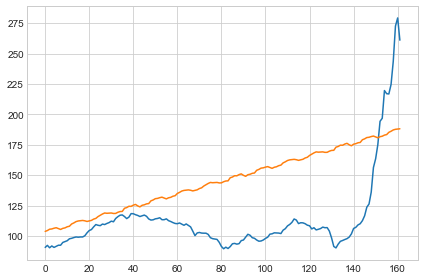

In [257]:
# Plotting the fit of the model
import matplotlib.pyplot as plt

plt.plot(list(data.loc[train_len:,'y']))
plt.plot(list(forecast.loc[train_len:,'yhat']))
plt.show()

It does not aproximate addecuately

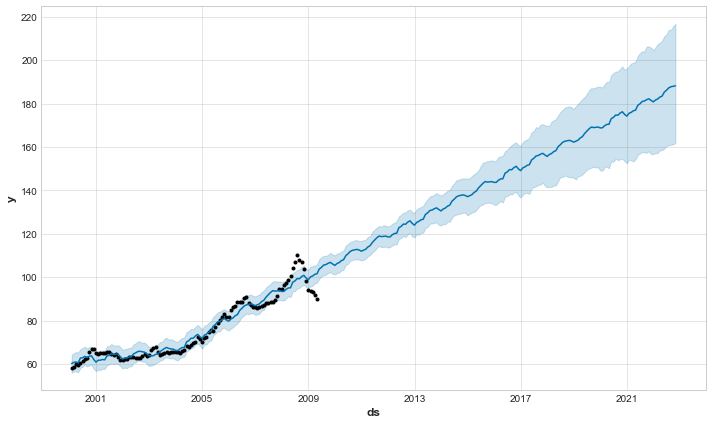

In [258]:
m.plot(forecast);   # To visualize forecast with the instance of the forecast created
                    # We can see the training data are represented as black dots and the forecast is a blue line 
                    # with upper and lower bounds in a blue shaded area.

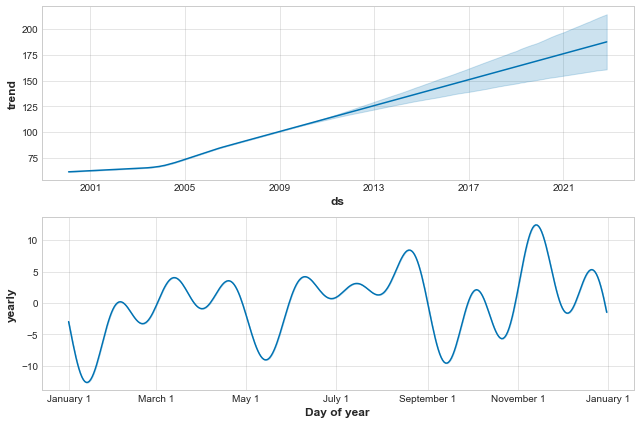

In [259]:
# To observe different components of the model separately: trend, yearly and weekly seasonality. 
# In addition, if you supply information about holidays and events to your model, they will also be shown in this plot.
m.plot_components(forecast);

In [260]:
print(', '.join(forecast.columns))

ds, trend, yhat_lower, yhat_upper, trend_lower, trend_upper, additive_terms, additive_terms_lower, additive_terms_upper, yearly, yearly_lower, yearly_upper, multiplicative_terms, multiplicative_terms_lower, multiplicative_terms_upper, yhat


In [261]:
def make_comparison_dataframe(historical, forecast):
    """Join the history with the forecast.
    
       The resulting dataset will contain columns 'yhat', 'yhat_lower', 'yhat_upper' and 'y'.
    """
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))


In [262]:
cmp_df = make_comparison_dataframe(data, forecast)    # The forecast itself is stored in the `yhat` column.
                                                     # The y value is the real one
cmp_df.tail(n=3)


yhat  yhat_lower  yhat_upper      y
ds                                                   
2022-08-31  187.723157  160.987124  213.953430  272.6
2022-09-30  187.910474  161.187361  215.592518  279.3
2022-10-31  188.150777  161.785858  216.709025  261.0

In [263]:
def calculate_forecast_errors(df_aux, prediction_size):
    """Calculate MAPE and MAE of the forecast.
    
       Args:
           df: joined dataset with 'y' and 'yhat' columns.
           prediction_size: number of days at the end to predict.
    """
    
    # Make a copy
    df = df_aux.copy()
    
    # Now we calculate the values of e_i and p_i according to the formulas given in the article above.
    df['e'] = df['y'] - df['yhat']
    df['p'] = 100 * df['e'] / df['y']
    
    # Recall that we held out the values of the last `prediction_size` days
    # in order to predict them and measure the quality of the model. 
    
    # Now cut out the part of the data which we made our prediction for.
    predicted_part = df[-prediction_size:]
    
    # Define the function that averages absolute error values over the predicted part.
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))
    
    # Now we can calculate MAPE and MAE and return the resulting dictionary of errors.
    return {'MAPE': error_mean('p'), 'MAE': error_mean('e')}


In [264]:
test_len

162

In [265]:
for err_name, err_value in calculate_forecast_errors(cmp_df, test_len).items():
    print(err_name, err_value)


MAPE 34.786698217438335
MAE 37.42301717458674


MAPE = 34.78% is quite high (note is provided in percentage unit)

In [266]:
# Forecast es en azul
# Los intervalos de confianza superior e inferior de lo forecasted estan en gris
# En rojo los valores reales (actual)
def show_forecast(cmp_df, num_predictions, num_values, title):
    """Visualize the forecast."""
    
    def create_go(name, column, num, **kwargs):
        points = cmp_df.tail(num)
        args = dict(name=name, x=points.index, y=points[column], mode='lines')
        args.update(kwargs)
        return go.Scatter(**args)
    
    lower_bound = create_go('Lower Bound', 'yhat_lower', num_predictions,
                            line=dict(width=0),
                            marker=dict(color="red"))
    upper_bound = create_go('Upper Bound', 'yhat_upper', num_predictions,
                            line=dict(width=0),
                            marker=dict(color="red"),
                            fillcolor='rgba(68, 68, 68, 0.3)', 
                            fill='tonexty')
    forecast = create_go('Forecast', 'yhat', num_predictions,
                         line=dict(color='rgb(31, 119, 180)'))
    actual = create_go('Actual', 'y', num_values,
                       marker=dict(color="red"))
    
    # In this case the order of the series is important because of the filling
    data = [lower_bound, upper_bound, forecast, actual]

    layout = go.Layout(yaxis=dict(title='Price'), title=title, showlegend = False)
    fig = go.Figure(data=data, layout=layout)
    iplot(fig, show_link=False)

show_forecast(cmp_df, test_len, 1000, 'New prices of Producer Prices for Domestic Energy Markets (montly)')


In [267]:
cmp_df

yhat  yhat_lower  yhat_upper      y
ds                                                   
2000-01-31   60.165875   55.875231   64.226142   58.3
2000-02-29   60.693533   56.567011   64.902009   58.8
2000-03-31   60.869348   56.524751   65.453335   59.8
2000-04-30   60.540587   56.180611   65.284537   59.4
2000-05-31   62.688623   58.247811   66.726177   60.6
...                ...         ...         ...    ...
2022-06-30  186.118275  160.323244  211.823464  224.6
2022-07-31  187.197078  160.755865  214.002279  243.6
2022-08-31  187.723157  160.987124  213.953430  272.6
2022-09-30  187.910474  161.187361  215.592518  279.3
2022-10-31  188.150777  161.785858  216.709025  261.0

[274 rows x 4 columns]

<h4 id="h4-prophettransformation">CASE 8.2: Prophet with Box-Cox Transformation</h4>

In [340]:
def inverse_boxcox(y, lambda_):
    return np.exp(y) if lambda_ == 0 else np.exp(np.log(lambda_ * y + 1) / lambda_)

In [341]:
data = pd.DataFrame()
data['value'] = df['Producer_Prices_Energy_Domestic']
#data.reset_index(inplace = True)
#data.drop('date', axis=1, inplace = True)
data.reset_index(inplace=True)
# The input to the method `fit` is a `DataFrame` with two columns:
data.columns = ['ds', 'y']

# Split train and test. 41% for train
train_len = (int)(0.41 * len(data))
test_len = len(data) - train_len

In [342]:
data

ds      y
0   2000-01-31   58.3
1   2000-02-29   58.8
2   2000-03-31   59.8
3   2000-04-30   59.4
4   2000-05-31   60.6
..         ...    ...
269 2022-06-30  224.6
270 2022-07-31  243.6
271 2022-08-31  272.6
272 2022-09-30  279.3
273 2022-10-31  261.0

[274 rows x 2 columns]

In [343]:
data_copy = data.copy() # To create a backup

In [344]:
from scipy import stats

data['y'], lambda_prophet = stats.boxcox(data['y'])

In [345]:
train_df = data[:train_len]

In [346]:
lambda_prophet

-0.7183931523066828

In [347]:
m2 = Prophet()
m2.fit(train_df) # To train with the transformed function
future2 = m2.make_future_dataframe(periods=test_len, freq = 'M', include_history = True)
forecast2 = m2.predict(future2) # To predict with the transformed function

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [348]:
for column in ['yhat', 'yhat_lower', 'yhat_upper']:
    forecast2[column] = inverse_boxcox(forecast2[column], lambda_prophet) # To restore forecasted values to original values with the inverse of BoxCox


d:\Users\mchamochin\Program Files\Python\Python37\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning:

invalid value encountered in log



In [349]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from matplotlib import pyplot as plt, style # for ploting

print('Test --------------------')
print("MAE test", mean_absolute_error(list(data_copy.loc[train_len:,'y']), list(forecast2.loc[train_len:,'yhat'] )))
print("MAPE test", mean_absolute_percentage_error(list(data_copy.loc[train_len:,'y']), list(forecast2.loc[train_len:,'yhat'] )))
print("R2 Score test", r2_score(list(data_copy.loc[train_len:,'y']), list(forecast2.loc[train_len:,'yhat'] )))

Test --------------------
MAE test 86.96545102697266
MAPE test 0.7733310671712758
R2 Score test -10.095232659220605


MAPE = 77.33% is quite high

<h3 id="h3-deepar">CASE 9: Amazon's DeepAR</h3>

DeepAR is a model developed by researchers at Amazon. DeepAR provides an interface to building time series models using a deep learning architecture based on RNNs.

DeepAR can be considered a competitor with Facebook’s Prophet. Both models try to deliver a simple-to-use model interface for models that are very complex under the hood. 

If you want to obtain good models with relatively little work, DeepAR and Prophet are definitely worth adding to your model benchmark.

DeepAR forecasts univariate or multivariate time series using RNN

In [32]:
y = pd.DataFrame()
y['value'] = df['Producer_Prices_Energy_Domestic']
#y.reset_index(inplace = True)
#y.drop('date', axis=1, inplace = True)
y.reset_index(inplace=True)
# The input to the method `fit` is a `DataFrame` with two columns:
y.columns = ['date', 'y']

# Split train and test. 41% for train
train_len = (int)(0.80 * len(y))
test_len = len(y) - train_len

We will be using the DeepAR model that is presented by the gluonts library. 

To use this library, we need to start by preparing the data to be in the format that this library understands. 

Gluonts uses a relatively unintuitive data format. It uses an object called `ListDataset`. It must contain the `target variable`, a `start timestamp`, and a `frequency`. 

The `train data` needs to contain the train data only, whereas the `test data` needs to contain the train and the test data.

In [33]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    274 non-null    datetime64[ns]
 1   y       274 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.4 KB


In [34]:
y

date      y
0   2000-01-31   58.3
1   2000-02-29   58.8
2   2000-03-31   59.8
3   2000-04-30   59.4
4   2000-05-31   60.6
..         ...    ...
269 2022-06-30  224.6
270 2022-07-31  243.6
271 2022-08-31  272.6
272 2022-09-30  279.3
273 2022-10-31  261.0

[274 rows x 2 columns]

In [35]:
y['date'] = y['date'].dt.strftime('%d-%m-%Y')

In [36]:
y

date      y
0    31-01-2000   58.3
1    29-02-2000   58.8
2    31-03-2000   59.8
3    30-04-2000   59.4
4    31-05-2000   60.6
..          ...    ...
269  30-06-2022  224.6
270  31-07-2022  243.6
271  31-08-2022  272.6
272  30-09-2022  279.3
273  31-10-2022  261.0

[274 rows x 2 columns]

In [37]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    274 non-null    object 
 1   y       274 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.4+ KB


In [38]:
# Unlogically, it is necessary to specify the seasonality “H” for hourly rather than “D” 
# for daily to obtain a reasonably accurate forecast. 
# This is likely due to an unresolved bug in gluonts at the time of writing.

#! pip install gluonts

from gluonts.dataset.common import ListDataset
start = pd.Timestamp("01-01-2000", freq="H")

# train dataset: cut the last window of length "prediction_length", add "target" and "start" fields
train_ds = ListDataset([{'target': y.loc[:train_len,'y'], 'start': start}], freq='H')
# test dataset: use the whole dataset, add "target" and "start" fields
test_ds = ListDataset([{'target': y['y'], 'start': start}],freq='H')

In [39]:
train_ds

[{'target': array([ 58.3,  58.8,  59.8,  59.4,  60.6,  61.4,  62.3,  62.9,  65.5,
          66.8,  67. ,  65.2,  64.7,  64.9,  64.9,  65.2,  65.6,  65.6,
          64.5,  64. ,  64.5,  63. ,  62. ,  61.7,  62.1,  62.2,  63. ,
          63.4,  63.1,  62.6,  62.6,  62.9,  63.7,  64.5,  63.5,  64.3,
          66.5,  67.5,  68. ,  65.5,  64.2,  64.4,  64.8,  65.6,  65.1,
          65.4,  65.6,  65.3,  65.5,  65.2,  66.1,  66.5,  68.1,  67.8,
          68.6,  69.7,  70.1,  72.3,  71.4,  70.3,  71.9,  72.5,  74.5,
          75.8,  75.3,  77. ,  78.9,  80.1,  81.6,  82.9,  81.8,  81.8,
          84.8,  86. ,  86.9,  88.3,  88.5,  88.7,  90.3,  90.6,  88.1,
          87. ,  86.4,  86.1,  85.7,  86. ,  86.5,  87.1,  87.9,  88.2,
          88.7,  88.6,  89.5,  91.3,  94.4,  94.7,  96.2,  97.1,  98.5,
         100.3, 104. , 107.1, 110.3, 108.1, 107.1, 103.9,  98.3,  94.1,
          93.5,  93.2,  91.7,  90. ,  90.6,  92.3,  90.3,  91.8,  90.6,
          91.5,  92.4,  92.4,  94.7,  95.4,  96.1,  97

In [40]:
test_ds

[{'target': array([ 58.3,  58.8,  59.8,  59.4,  60.6,  61.4,  62.3,  62.9,  65.5,
          66.8,  67. ,  65.2,  64.7,  64.9,  64.9,  65.2,  65.6,  65.6,
          64.5,  64. ,  64.5,  63. ,  62. ,  61.7,  62.1,  62.2,  63. ,
          63.4,  63.1,  62.6,  62.6,  62.9,  63.7,  64.5,  63.5,  64.3,
          66.5,  67.5,  68. ,  65.5,  64.2,  64.4,  64.8,  65.6,  65.1,
          65.4,  65.6,  65.3,  65.5,  65.2,  66.1,  66.5,  68.1,  67.8,
          68.6,  69.7,  70.1,  72.3,  71.4,  70.3,  71.9,  72.5,  74.5,
          75.8,  75.3,  77. ,  78.9,  80.1,  81.6,  82.9,  81.8,  81.8,
          84.8,  86. ,  86.9,  88.3,  88.5,  88.7,  90.3,  90.6,  88.1,
          87. ,  86.4,  86.1,  85.7,  86. ,  86.5,  87.1,  87.9,  88.2,
          88.7,  88.6,  89.5,  91.3,  94.4,  94.7,  96.2,  97.1,  98.5,
         100.3, 104. , 107.1, 110.3, 108.1, 107.1, 103.9,  98.3,  94.1,
          93.5,  93.2,  91.7,  90. ,  90.6,  92.3,  90.3,  91.8,  90.6,
          91.5,  92.4,  92.4,  94.7,  95.4,  96.1,  97

Fitting the default DeepAR model

In [41]:
#!pip install mxnet
#!pip install mx

#from gluonts.model.deepar import DeepAREstimator
#from gluonts.trainer import Trainer
from gluonts.mx import DeepAREstimator
from gluonts.mx.trainer import Trainer
import mxnet as mx
import numpy as np

np.random.seed(7)
mx.random.seed(7)

estimator = DeepAREstimator(
    prediction_length=28,
    context_length=100,
    freq='H',
    trainer=Trainer(
                    #ctx="gpu", # remove if running on windows
                    epochs=5,
                    learning_rate=1e-3,
                    num_batches_per_epoch=100
                   )
)

predictor = estimator.train(train_ds)

100%|██████████| 100/100 [00:10<00:00,  9.72it/s, epoch=5/5, avg_epoch_loss=1.88]


In [42]:
#Predict
predictions = predictor.predict(test_ds)
predictions = list(predictions)[0]
predictions = predictions.quantile(0.5)

Test --------------------
MAE test 65.96862
MAPE test 0.44556737
R2 Score test -0.5284795832261113


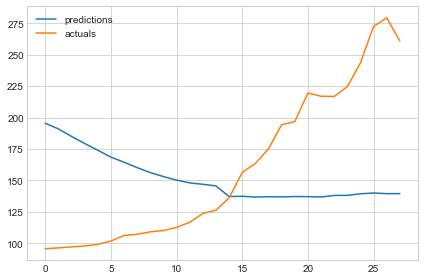

In [43]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from matplotlib import pyplot as plt, style # for ploting

print('Test --------------------')
print("MAE test", mean_absolute_error(list(test_ds)[0]['target'][-28:], predictions))
print("MAPE test", mean_absolute_percentage_error(list(test_ds)[0]['target'][-28:], predictions))
print("R2 Score test", r2_score(list(test_ds)[0]['target'][-28:], predictions))

import matplotlib.pyplot as plt
plt.plot(predictions)
plt.plot(list(test_ds)[0]['target'][-28:])
plt.legend(['predictions', 'actuals'])
plt.show()

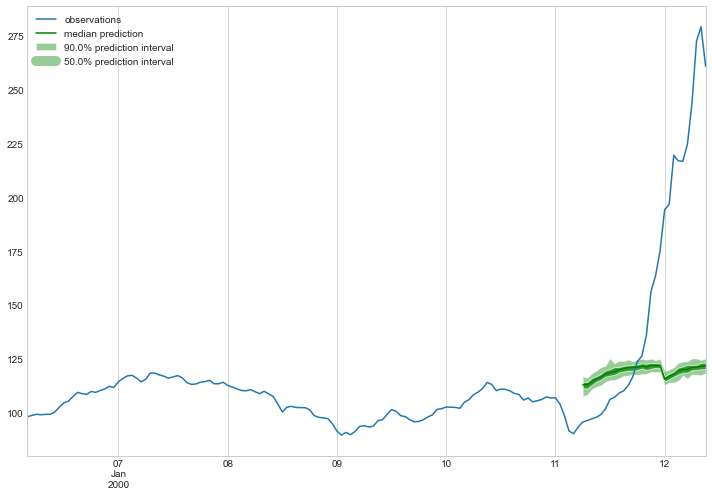

In [44]:
# Probability forecast graph
from gluonts.evaluation.backtest import make_evaluation_predictions

forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_ds,  # test dataset
    predictor=predictor,  # predictor
    num_samples=100,  # number of sample paths we want for evaluation
)

forecasts = list(forecast_it)
tss = list(ts_it)

ts_entry = tss[0]
forecast_entry = forecasts[0]

def plot_prob_forecasts(ts_entry, forecast_entry):
    plot_length = 150
    prediction_intervals = (50.0, 90.0)
    legend = ["observations", "median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]

    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    ts_entry[-plot_length:].plot(ax=ax)  # plot the time series
    forecast_entry.plot(prediction_intervals=prediction_intervals, color='g')
    plt.grid(which="both")
    plt.legend(legend, loc="upper left")
    plt.show()

plot_prob_forecasts(ts_entry, forecast_entry)
plt.show()


In [ ]:
# Tuning the hyperparameters
np.random.seed(7)
mx.random.seed(7)

# My example
batch_size = 16   # 100 before
num_epochs = 25 # 10 before
num_units = 128   # 100 before

results = []

for learning_rate in [1e-4, 1e-3, 1e-2, 1e-1]:
  for num_layers in [1, 2, 3, 4, 5, 7, 10]:
    for num_cells in [5, 10, 20, 30, 40, 50, num_units]:

      estimator = DeepAREstimator(
          prediction_length=28,
          freq='H',
          trainer=Trainer(#ctx="gpu", # remove if on Windows
                          epochs=num_epochs,
                          learning_rate=learning_rate,
                          num_batches_per_epoch=batch_size
                        ),
          num_layers = num_layers,
          num_cells = num_cells,
      )

      predictor = estimator.train(train_ds)

      predictions = predictor.predict(test_ds)

      r2 = r2_score(list(predictions)[0].quantile(0.5), list(test_ds)[0]['target'][-28:])
      result = [learning_rate, num_layers, num_cells, r2]
      print(result)
      results.append(result)